In [1]:
import pandas as pd
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
import dask.dataframe as dd
import matplotlib.cm as cm
import os

In [2]:
Analise_Potencia = False
Analise_Reserva = False

In [3]:
mainpath = 'C:/Users/david/OneDrive/Documents/FERV_documentos/RESULTS'
dic_cenarios = {
                # 'MPA FNS Lim Scenario 2022' : f'{mainpath}/MPV_(FNS Lim)_RC/',
                # 'V1A1F2 2026' :f'{mainpath}/V1A1F2_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F2 2026' :f'{mainpath}/V1A1F2_RESP_FNS_lim_rev2_2026/',
                # 'V1A1F3 2026' :f'{mainpath}/V1A1F3_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F4 2026' :f'{mainpath}/V1A1F4_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F5 2026' :f'{mainpath}/V1A1F5_RESP_FNS_lim_rev1_2026/',

                'V1A1F2 2026' :f'{mainpath}/V1A1F2_rev5/',
                # 'V1A1F3 2026' :f'{mainpath}/V1A1F3_rev5/',
                # 'V1A1F4 2026' :f'{mainpath}/V1A1F4_rev5/',
                # 'V1A1F5 2026' :f'{mainpath}/V1A1F5_rev5/',

                # 'V2A2F2 2026' :f'{mainpath}/V2A2F2_REV02_2026/',
                # 'V2A2F3 2026' :f'{mainpath}/V2A2F3_REV02_2026/',
                # 'V2A2F4 2026' :f'{mainpath}/V2A2F4_REV02_2026/', 
                # 'V2A2F5 2026' :f'{mainpath}/V2A2F5_REV02_2026/',

                # 'V2A2F2 2026' :f'{mainpath}/V2A2F2_rev5/',
                # 'V2A2F3 2026' :f'{mainpath}/V2A2F3_rev5/',
                # 'V2A2F4 2026' :f'{mainpath}/V2A2F4_rev5/', 
                # 'V2A2F5 2026' :f'{mainpath}/V2A2F5_rev5/',

                # 'V2A2F2 2026 UNICAMP' :f'{mainpath}/V2A2F2_RESP_in_FNS_lim_Unicamp/',
                # 'V2A2F3 2026 UNICAMP' :f'{mainpath}/V2A2F3_RESP_in_FNS_lim_Unicamp/',
                # 'V2A2F4 2026 UNICAMP' :f'{mainpath}/V2A2F4_RESP_in_FNS_lim_Unicamp/', 
                # 'V2A2F5 2026 UNICAMP' :f'{mainpath}/V2A2F5_RESP_in_FNS_lim_Unicamp/',

                # 'V3A3F2 2026' :f'{mainpath}/V3A3F2_REV1_2026/',
                # 'V3A3F3 2026' :f'{mainpath}/V3A3F3_REV1_2026/',
                # 'V3A3F4 2026' :f'{mainpath}/V3A3F4_REV1_2026/',
                # 'V3A3F5 2026' :f'{mainpath}/V3A3F5_REV1_2026/',

                # 'V3A3F2 2026' :f'{mainpath}/V3A3F2_rev5/',
                # 'V3A3F3 2026' :f'{mainpath}/V3A3F3_rev5/',
                # 'V3A3F4 2026' :f'{mainpath}/V3A3F4_rev5/', 
                # 'V3A3F5 2026' :f'{mainpath}/V3A3F5_rev5/',
                }

dirGeral = 'StaticAnalysis/Data/Geral/'
# dirIndice = 'StaticAnalysis/Data/Indice_n_supremo/'
dirIndice = 'StaticAnalysis/Data/Indice_n_2/'
dirRamos = 'StaticAnalysis/Data/Fluxo em Ramos/'
dirPotencia = 'StaticAnalysis/Data/Potencia/'

filenames = [
                (dirGeral + 'OPF_NC.csv', 'OPF_NC'), 
                (dirGeral + 'PWF_NC.csv', 'PWF_NC'),
                (dirGeral + 'Df_ger.csv', 'ger'), 
                (dirGeral + 'Df_nt.csv', 'nt'), 
                (dirRamos + 'Df_Linhas.csv', 'linhas'), 
                (dirRamos + 'Df_Trafo.csv', 'Trafo'), 
                (dirRamos + 'DF_Intercambios.csv', 'intercambios'), 
                (dirRamos + 'DF_HVDC.csv', 'HVDC'), 
                (dirIndice + 'Df_DPI_S2.csv', 'Index'), 
                (dirIndice +'Df_DPI_S4.csv', 'Index_PO'), 
                (dirIndice + 'Df_DPI_S3.csv', 'Index_Modif'), 
                (dirIndice +'Df_PQ_DPI_S1.csv', 'IndexDec_PQ'), 
                (dirIndice +'Df_PV_DPI_S1.csv', 'IndexDec_PV'), 
                (dirPotencia+'Df_MW-MVAR_PO.csv', 'pot_mw_mvar'),  
                (dirPotencia+'Df_Reserva_PO_MW.csv', 'pot_mw_reserv'), 
                # (dirPotencia+'Df_Reserva_PO_MVAR.csv', 'pot_mvar_reserv'),
                (dirPotencia+'DF_POT_Reg.csv', 'ger_reg'),
            ]
import colorcet as cc
intense_palette = sns.color_palette(cc.glasbey, n_colors=12)  # You can adjust the number of colors as needed
namescenarios = {key:[key,intense_palette[idx]] for idx, key in enumerate(dic_cenarios.keys())}
itemsforanalysis = [var for _,var in filenames]

# Data Processing

## Funtions for extract and process

In [4]:
def read_data():
    def read_and_append(filename, cenario, lst):
        df = dd.read_csv(filename)
        df['Cenario'] = cenario
        # if cenario == 'V1A1F2 Scenario 2022 FNS':
        #     df['Dia'] = df['Dia'] - 1
        lst.append(df.compute())
        return lst

    keys = [i for _,i in filenames]
    dfs = {}
    for key in keys:
        dfs[key] = []
    for i,j in  dic_cenarios.items():
        for filename, key in filenames:
            dfs[key] = read_and_append(j + filename, i, dfs[key])

    return dfs

# Function to calculate indices for lines
def IndiceLinhas(df, n):

    df['MW_Flow'] = np.where(df['MW:From-To'] >= 0, df['MW:From-To'], df['MW:To-From'])
    df['PI_mva'] = (df['% L1'] / 100) ** (2 * n)

    # Group by multiple columns and aggregate
    df_r_nt = df.groupby(
        ['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV']
    ).agg({'MW_Flow': 'sum', 'MVA': 'sum', 'PI_mva': 'sum'})

    # df_r_nt['PFI'] = df_r_nt['MW_Flow'] / df_r_nt['MVA']
    df_r_nt['Mva_index'] = df_r_nt['PI_mva'] ** (1 / (2 * n))

    return df_r_nt

# Function to flatten DataFrame
def flatdf(df, BG):
    df_reordered = df.reorder_levels(['key','Dia', 'Hora', 'Cenario', 'REG', BG])
    regionmap = {
        'Nordeste': 'Northeast', 'Norte': 'North', 'Sudeste-Centro-Oeste': 'SE-CW',
        'Sul': 'South', 'AC-RO': 'AC-RO'
    }
    df_reordered = df_reordered.rename(index=regionmap, level='REG')
    df_reordered_sorted = df_reordered.sort_index(level=['key','Dia', 'Hora', 'Cenario', 'REG'])
    df_reordered_sorted.rename(columns={'CSI_INF': 'DPI_inf', 'CSI_SUP': 'DPI_sup'}, inplace=True)

    lista = [[index[0], index[1], index[2], index[3]] for index in df_reordered.index]
    conjunto_filtros = set(map(tuple, lista))
    conjunto_filtros = tuple(sorted(conjunto_filtros))

    data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]
    datapd = pd.DataFrame(data, index=conjunto_filtros)
    datapd.index.names = ['key','Dia', 'Hora', 'Cenario']
    
    columns = []
    for reg in df_reordered_sorted.reset_index('REG')['REG'].unique():
        for bg in df_reordered_sorted.loc[:, :, :, : ,reg, :].reset_index(BG)[BG].unique():
            for column in df_reordered_sorted.columns:
                reg_name = 'SE-CO' if reg == 'Sudeste-Centro-Oeste' else reg
                columns.append(f"{column}_{reg_name}_{bg}")

    datapd.columns = columns
    return datapd

# Function to read data
def read_data():
    def read_and_append(filename, cenario, lst):
        df = dd.read_csv(filename)
        df['Cenario'] = cenario
        # if cenario == 'V1A1F2 Scenario 2022 FNS':
        #     df['Dia'] = df['Dia'] - 1
        lst.append(df.compute())
        return lst

    keys = [i for _,i in filenames]
    dfs = {}
    for key in keys:
        dfs[key] = []
    for i,j in  dic_cenarios.items():
        for filename, key in filenames:
            dfs[key] = read_and_append(j + filename, i, dfs[key])

    return dfs

# Funtion to obtain the main features (buses) that contribute in the DPI_1 
def computefeatures(df_nt, df_ger, dfpq, dfpv):
    # Step 1: Merge DataFrames with only necessary columns
    dfpq_cols = ['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV', 'CSI_INF', 'CSI_SUP']
    dfpv_cols = ['Dia', 'Hora', 'Cenario', 'REG', 'Gen_Type', 'CSI_INF', 'CSI_SUP']

    datafeatures_pq = df_nt.merge(dfpq[dfpq_cols], on=['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV'], how='left')
    datafeatures_pq = datafeatures_pq[['BUS_ID', 'BUS_NAME', 'ARE', 'VBASEKV', 'REG', 'U_FED', 'Dia', 'Hora', 'CSI_INF', 'CSI_SUP', 'IndiceInf', 'IndiceSup', 'B0_MVAR']]

    datafeatures_pv = df_ger.merge(dfpv[dfpv_cols], on=['Dia', 'Hora', 'Cenario', 'REG', 'Gen_Type'], how='left')
    datafeatures_pv = datafeatures_pv[['BUS_ID', 'BUS_NAME', 'ARE', 'Gen_Type', 'REG', 'U_FED', 'Dia', 'Hora', 'CSI_INF', 'CSI_SUP', 'IndiceInf', 'IndiceSup', 'PG_MW', 'QG_MVAR']]

    # Step 2: Calculate Importance using vectorized operations
    datafeatures_pq['Importance_inf'] = datafeatures_pq['IndiceInf'] / datafeatures_pq['CSI_INF'].replace(0, np.nan)
    datafeatures_pq['Importance_sup'] = datafeatures_pq['IndiceSup'] / datafeatures_pq['CSI_SUP'].replace(0, np.nan)

    datafeatures_pv['Importance_inf'] = datafeatures_pv['IndiceInf'] / datafeatures_pv['CSI_INF'].replace(0, np.nan)
    datafeatures_pv['Importance_sup'] = datafeatures_pv['IndiceSup'] / datafeatures_pv['CSI_SUP'].replace(0, np.nan)

    # Step 3: Filter rows directly without fillna
    datafeatures_pq = datafeatures_pq[datafeatures_pq['B0_MVAR'].notna() & (datafeatures_pq['B0_MVAR'] != 0)]
    datafeatures_pv = datafeatures_pv[datafeatures_pv['QG_MVAR'].notna() & (datafeatures_pv['QG_MVAR'] != 0)]

    # Optional: Fill NaN values in other columns with zero if necessary
    datafeatures_pq.fillna(0, inplace=True)
    datafeatures_pv.fillna(0, inplace=True)
    
    # Step 4: Group by BUS_ID and aggregate fields
    dfeatures_pq = datafeatures_pq.groupby('BUS_ID').agg({
        'Importance_inf': 'mean',
        'Importance_sup': 'mean',
        'REG': 'first',
        'VBASEKV': 'first',
        'BUS_NAME': 'first'
    }).reset_index()
    
    dfeatures_pv = datafeatures_pv.groupby('BUS_ID').agg({
        'Importance_inf': 'mean',
        'Importance_sup': 'mean',
        'REG': 'first',
        'Gen_Type': 'first',
        'BUS_NAME': 'first'
    }).reset_index()
    
    # Step 5: Extract top `nbuses` rows for Importance_inf and Importance_sup
    nbuses = 5
    
    def top_n_group(df, group_cols, sort_col, n):
        return df.groupby(group_cols).apply(lambda x: x.nlargest(n, sort_col)).reset_index(drop=True)
    
    result_inf_pq = top_n_group(dfeatures_pq, ['REG', 'VBASEKV'], 'Importance_inf', nbuses)[['REG', 'VBASEKV', 'BUS_ID', 'BUS_NAME', 'Importance_inf']]
    result_sup_pq = top_n_group(dfeatures_pq, ['REG', 'VBASEKV'], 'Importance_sup', nbuses)[['REG', 'VBASEKV', 'BUS_ID', 'BUS_NAME', 'Importance_sup']]
    result_inf_pv = top_n_group(dfeatures_pv, ['REG', 'Gen_Type'], 'Importance_inf', nbuses)[['REG', 'Gen_Type', 'BUS_ID', 'BUS_NAME', 'Importance_inf']]
    result_sup_pv = top_n_group(dfeatures_pv, ['REG', 'Gen_Type'], 'Importance_sup', nbuses)[['REG', 'Gen_Type', 'BUS_ID', 'BUS_NAME', 'Importance_sup']]
    
    # Step 6: Filter by BUS_ID
    features_inf_pq = result_inf_pq[result_inf_pq['Importance_inf'] != 0]
    features_sup_pq = result_sup_pq[result_sup_pq['Importance_sup'] != 0]
    features_inf_pv = result_inf_pv[result_inf_pv['Importance_inf'] != 0]
    features_sup_pv = result_sup_pv[result_sup_pv['Importance_sup'] != 0]
    
    # Step 7: Pivot tables
    def pivot_table(df, values_list, value_column, index_columns=['Dia', 'Hora', 'Cenario'], pivot_column='BUS_NAME'):
        filtered_df = df[df['BUS_ID'].isin(values_list)]
        pivot_df = filtered_df.pivot_table(index=index_columns, columns=pivot_column, values=value_column, aggfunc='first').reset_index()
        return pivot_df
    
    features_sup_pq_df = pivot_table(df_nt, features_sup_pq['BUS_ID'].to_list(), 'B0_MVAR')
    features_inf_pq_df = pivot_table(df_nt, features_inf_pq['BUS_ID'].to_list(), 'B0_MVAR')
    features_sup_pv_df = pivot_table(df_ger, features_sup_pv['BUS_ID'].to_list(), 'QG_MVAR')
    features_inf_pv_df = pivot_table(df_ger, features_inf_pv['BUS_ID'].to_list(), 'QG_MVAR')
    
    return features_sup_pq_df, features_inf_pq_df, features_sup_pv_df, features_inf_pv_df

# Funtion to obtain the main features (buses) that contribute in the Line index
def computefeatures_2(df_nt, df_r_nt):

    datafeatures_pq = df_nt.merge(df_r_nt, on=['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV'], how='left')[['From#', 'To#', 'From Name', 'To Name', '% L1', 'Mvar:Losses', 'Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV', 'Mva_index']]

    # Step 2: Calculate Importance using vectorized operations
    datafeatures_pq['importance_lines'] = datafeatures_pq['% L1'] / datafeatures_pq['Mva_index'].replace(0, np.nan)
    datafeatures_pq.fillna(0, inplace=True)

    # Step 4: Group by BUS_ID and aggregate fields
    dfeatures_pq = datafeatures_pq.groupby(['From#', 'To#']).agg({
        'importance_lines': 'mean',
        'REG': 'first',
        'VBASEKV': 'first',
        'From Name': 'first',
        'To Name':'first'
    }).reset_index()
    
    # Step 5: Extract top `nbuses` rows for Importance_inf and Importance_sup
    nlines = 5
    
    def top_n_group(df, group_cols, sort_col, n):
        return df.groupby(group_cols).apply(lambda x: x.nlargest(n, sort_col)).reset_index(drop=True)
    
    result_inf_pq = top_n_group(dfeatures_pq, ['REG', 'VBASEKV'], 'importance_lines', nlines)[['REG', 'VBASEKV','From#', 'To#', 'From Name', 'To Name','importance_lines']]
    result_inf_pq = result_inf_pq.set_index(['From Name', 'To Name'])
    mask = df_nt[['From Name', 'To Name']].apply(tuple, axis=1)
    filteredlines = df_nt[mask.isin(result_inf_pq.index)]

    # Step 7: Pivot tables
    def pivot_table(df, value_column, index_columns=['Dia', 'Hora', 'Cenario'], pivot_column=['From Name', 'To Name']):
        pivot_df = df.pivot_table(index=index_columns, columns=pivot_column, values=value_column, aggfunc='first').reset_index()
        return pivot_df

    features_inf_pq_df = pivot_table(filteredlines, ['% L1', 'Mvar:Losses'])
    # features_inf_pq_df = pivot_table(filteredlines, ['MW_Flow'])
    features_inf_pq_df.columns = [' |'.join(filter(None, col)).strip() for col in features_inf_pq_df.columns]

    return  features_inf_pq_df

# Function to filter data based on non-convergent conditions
def filtarNC(df_list):
    df_filtrado = []
    for df_ in df_list:
        cenario = df_['Cenario'][0]
        bool_PWF_NConv = df_indice_grop[
            df_indice_grop['Cenario'] == cenario
        ][['Dia', 'Hora']].apply(tuple, axis=1)
        filtro = df_[['Dia', 'Hora']].apply(tuple, axis=1).isin(bool_PWF_NConv)
        df_filtrado.append(df_[filtro])
    return df_filtrado

## Funtions for concatenate

In [5]:
# Function to concatenate and process data (part 1)
def concatenation_1():
    data = {}
    
    # print('====== Selecting Critical Buses as features ======')
    ddffpv = pd.concat(dfs['IndexDec_PV'], axis=0).set_index(['Dia', 'Hora', 'Cenario', 'REG', 'Gen_Type', 'key'])
    ddffpq = pd.concat(dfs['IndexDec_PQ'], axis=0).set_index(['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV', 'key'])
    # Df_ger = pd.concat(dfs['ger'], axis=0)
    # Df_nt = pd.concat(dfs['nt'], axis=0)
    # data['features_sup_pq_df'], data['features_inf_pq_df'], data['features_sup_pv_df'], data['features_inf_pv_df'] = computefeatures(Df_nt, Df_ger, ddffpq.reset_index(), ddffpv.reset_index())
    
    print('====== Concatenation of Other Data ======')
    data['df_DPI'] = pd.concat([flatdf(ddffpq, 'VBASEKV'), flatdf(ddffpv, 'Gen_Type')], axis=1)
    data['df_ger_reg_concat'] = pd.concat(filtarNC(dfs['ger_reg']), axis=0)
    data['df_indice_group'] = pd.concat(dfs['Index_Modif'], axis=0).rename(columns={'Unnamed: 0': 'Indice'})

    if all(keyword in itemsforanalysis for keyword in ['linhas', 'Trafo', 'intercambios', 'HVDC', 'pot_mw_reserv']):

        # print('====== Selecting Critical Lines as features ======')
        data['df_linhas'] = pd.concat(dfs['linhas'], axis=0)
        data['df_linhas'] = data['df_linhas'][(data['df_linhas']['L1(MVA)']!=9999) & (data['df_linhas']['VBASEKV'].isin([230, 345, 440, 500, 525, 765]))]
        dfl_r_nt = IndiceLinhas(data['df_linhas'], 2)
        # data['features_lines'] = computefeatures_2(data['df_linhas'], dfl_r_nt.reset_index())

        df_intercambios_01 = pd.concat(dfs['intercambios'], axis=0).rename(columns={'Intercambio AC': 'Intercambio'})
        df_hvdc_01 = pd.concat(dfs['HVDC'], axis=0).rename(columns={'Nome Elo':'Intercambio', ' P(MW)': 'MW:From-To', ' Q(Mvar)': 'Mvar:From-To'})
        df_Indice_REG = pd.concat(dfs['Index'], axis=0).rename(columns={'level_0': 'Indice'})
        data['df_Trafo'] = pd.concat(dfs['Trafo'], axis=0).rename(columns={'% L1': '% L1_Trafo', 'Mvar:Losses': 'Mvar:Losses_Trafo'})
        data['df_reserva'] = pd.concat(dfs['pot_mw_reserv'], axis=0).set_index(['Dia', 'Hora', 'Cenario'])
        df_intercambios_01 = df_intercambios_01.set_index(['key','Dia', 'Hora', 'Cenario', 'Intercambio'])
        df_hvdc_01 = df_hvdc_01.set_index(['key','Dia', 'Hora', 'Cenario', 'Intercambio'])

        concatenated_HVDC = pd.concat([
                df_hvdc_01.loc[:,:, :, :, 'Elo_FOZ-IBIUNA']['MW:From-To'],
                df_hvdc_01.loc[:,:, :, :, 'Elo_PVEL-ARARQ']['MW:From-To'],
                df_hvdc_01.loc[:,:, :, :, 'Elo_XINGU-SE']['MW:From-To'],
                # df_hvdc_01.loc[:,:, :, :, 'Elo_CPVBTB-PVEL']['MW:From-To']
                ], axis=1, keys=['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE'])

        concatenated_FluxoAC = pd.concat([
                df_intercambios_01.loc[:,:, :, :, 'EXP_NE']['MW:From-To'],
                df_intercambios_01.loc[:,:, :, :, 'Fluxo_NE-N']['MW:From-To'],
                df_intercambios_01.loc[:,:, :, :, 'Fluxo_NE-SE']['MW:From-To'], 
                df_intercambios_01.loc[:,:, :, :, 'Fluxo_N-S']['MW:From-To'],
                df_intercambios_01.loc[:,:, :, :, 'Fluxo_SUL-SECO']['MW:From-To']

                ], axis=1, keys=['EXP_NE', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_N-S','Fluxo_SUL-SECO'])

        data['df_Inter_AC_DC'] = concatenated_HVDC.merge(concatenated_FluxoAC, on=['key','Dia', 'Hora', 'Cenario'], how='left')
    
    data['df_indice_grop'] = df_indice_grop.set_index(['key','Dia', 'Hora', 'Cenario'])
    data['df_indice_group'] = data['df_indice_group'].set_index(['key','Dia', 'Hora', 'Cenario'])
    data['df_Indice_REG'] = df_Indice_REG.set_index(['Indice', 'key','Dia', 'Hora', 'REG', 'Cenario'])

    return data

# Function to concatenate and process data (part 2)
def concatenation_2(data):

    Jirau = [7051, 7061]
    S_Antonio = [7050, 7062, 7064]
    G_Uhe_230_ACRO = [6888, 6892, 6891]
    Tucurui = [6419, 6420, 6422, 6424, 6425]
    B_Monte = [6729]
    Itaipu_50 = [1100]
    Itaipu_60 = [1107]
    I_Solt = [501]
    AngraI = [10]
    AngraII = [11]
    TPires = [4492]
    S_Mesa = [36]
    XINGO = [5061]
    Furnas = [16]

    DF_complete_PO = data['df_ger_reg_concat'].drop(columns=['REG', 'PG_FERV']).groupby(by=['key','Dia', 'Hora', 'Cenario']).sum(numeric_only=True)
    DF_complete_PO = data['df_indice_group'].merge(DF_complete_PO, on=['key','Dia', 'Hora', 'Cenario'], how='left')
    DF_complete_PO['PG_FERV'] = (DF_complete_PO['PG_EOL'] + DF_complete_PO['PG_SOL']) / DF_complete_PO['PL_MW']
    DF_complete_PO['DL_MW'] = DF_complete_PO['PL_MW'] - (DF_complete_PO['PG_EOL'] + DF_complete_PO['PG_SOL'])
    
    if 'ger' in itemsforanalysis:
        print('====== Start processing (PO) ======')
        Df_ger = pd.concat(dfs['ger'], axis=0)

        Df_ger = Df_ger[Df_ger['BUS_ID'].isin(Jirau + S_Antonio + Tucurui + B_Monte + Itaipu_50 + Itaipu_60 + I_Solt + G_Uhe_230_ACRO+AngraI+AngraII+TPires+S_Mesa+XINGO+Furnas)]
        DF_complete_PO[['Jirau_MW', 'Jirau_MVAR', 'Jirau_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(Jirau)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['S_Antonio_MW', 'S_Antonio_MVAR', 'S_Antonio_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(S_Antonio)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['Tucurui_MW', 'Tucurui_MVAR', 'Tucurui_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(Tucurui)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve',]].sum()
        DF_complete_PO[['B_Monte_MW', 'B_Monte_MVAR', 'B_Monte_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(B_Monte)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['Itaipu_50_MW', 'Itaipu_50_MVAR', 'Itaipu_50_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(Itaipu_50)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['Itaipu_60_MW', 'Itaipu_60_MVAR', 'Itaipu_60_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(Itaipu_60)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['I_Solt_MW', 'I_Solt_MVAR', 'I_Solt_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(I_Solt)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['G_ACRO_230_MW', 'G_ACRO_230_MVAR', 'G_ACRO_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(G_Uhe_230_ACRO)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['AngraI_MW', 'AngraI_MVAR', 'AngraI_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(AngraI)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['AngraII_MW', 'AngraII_MVAR', 'AngraII_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(AngraII)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['TPires_MW', 'TPires_MVAR', 'TPires_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(TPires)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['S_Mesa_MW', 'S_Mesa_MVAR', 'S_Mesa_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(S_Mesa)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['XINGO_MW', 'XINGO_MVAR', 'XINGO_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(XINGO)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()
        DF_complete_PO[['Furnas_MW', 'Furnas_MVAR', 'Furnas_Reserva']] = Df_ger[Df_ger['BUS_ID'].isin(Furnas)].groupby(by=['key','Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR', ' Reserve']].sum()

    return DF_complete_PO

# Function to concatenate and process data (part 3)
def concatenation_3(data):
    print('====== Start processing (REG) ======')
    DFF_POT_REG = data['df_ger_reg_concat'].set_index(['Dia', 'Hora', 'REG', 'Cenario']).drop(columns='PG_FERV')
    
    if all(keyword in itemsforanalysis for keyword in ['linhas', 'Trafo', 'intercambios', 'HVDC', 'pot_mw_reserv']):

        df_linhas_500up = data['df_linhas'][data['df_linhas']['VBASEKV'].isin([500, 525, 765])]
        df_linhas_500down = data['df_linhas'][data['df_linhas']['VBASEKV'].isin([230, 345, 440])]
        df_linhas_500up_grouped = df_linhas_500up.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500up', 'Mvar:Losses': 'Mvar:Losses_500up'})
        df_linhas_500down_grouped = df_linhas_500down.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500down', 'Mvar:Losses': 'Mvar:Losses_500down'})
        df_linhas_grouped_REG = pd.concat([df_linhas_500up_grouped, df_linhas_500down_grouped], axis=1)

        df_Trafo_grouped_REG = data['df_Trafo'][data['df_Trafo']['VBASEKV'].isin([230, 345, 440, 500, 525, 765])].groupby(by=['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1_Trafo': 'mean', 'Mvar:Losses_Trafo': 'sum'})
        DF_complete_PO_REG = df_linhas_grouped_REG.merge(df_Trafo_grouped_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
        DF_complete_PO_REG = DF_complete_PO_REG.merge(DFF_POT_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    else:
        DF_complete_PO_REG = DFF_POT_REG

    df_Indice_REG_PV = data['df_Indice_REG'].loc['DPI_PV']
    df_Indice_REG_PQ = data['df_Indice_REG'].loc['DPI_PQ']
    df_REG_Cenario_PV = df_Indice_REG_PV.merge(DF_complete_PO_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    df_REG_Cenario_PQ = df_Indice_REG_PQ.merge(DF_complete_PO_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')

    Df_data_completo_reg = df_REG_Cenario_PQ[['OV DPI', 'UV DPI']].merge(df_REG_Cenario_PV, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    Df_data_completo_reg.rename(columns={'OV DPI_x': 'OV DPI_PQ', 'UV DPI_x': 'UV DPI_PQ', 'OV DPI_y': 'OV DPI_PV', 'UV DPI_y': 'UV DPI_PV'}, inplace=True)

    if all(keyword in itemsforanalysis for keyword in ['linhas', 'Trafo', 'intercambios', 'HVDC', 'pot_mw_reserv']):
        Df_data_completo_reg.fillna({'Mvar:Losses_500up': 0, '% L1_500up': 0, 'Mvar:Losses_500down': 0, '% L1_500down': 0}, inplace=True)

    return Df_data_completo_reg

# Main code execution
if __name__ == '__main__':
    print('Reading data...')
    dfs = read_data()
    df_indice_grop = pd.concat(dfs['Index_PO'], axis=0)
    
    print('Concatenating data...')
    DATA = concatenation_1()
    
    DF_complete_PO = concatenation_2(DATA)
    Df_data_completo_reg = concatenation_3(DATA)
    
    # Renaming regions
    regionmap = {
        'Nordeste': 'Northeast', 'Norte': 'North', 'Sudeste-Centro-Oeste': 'SE-CW',
        'Sul': 'South', 'AC-RO': 'AC-RO'
                }
    
    Df_data_completo_reg = Df_data_completo_reg.rename(index=regionmap, level='REG')


Reading data...
Concatenating data...
====== Concatenation of Other Data ======
====== Start processing (PO) ======
====== Start processing (REG) ======


# Analise Convergencia

In [6]:
print('NUMERO TOTAL DE CASOS ANALISADOS: ',DATA['df_DPI'].shape[0])
print('NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF: ',pd.concat(dfs['OPF_NC'],axis=0).shape[0])
print('NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF: ',pd.concat(dfs['PWF_NC'],axis=0).shape[0])

NUMERO TOTAL DE CASOS ANALISADOS:  1344
NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF:  1277
NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF:  0


In [7]:
for chave in dic_cenarios.keys():
    print("Cenario ", chave)
    dt = pd.concat(dfs['OPF_NC'],axis=0)
    dt_ = pd.concat(dfs['PWF_NC'],axis=0)
    print('NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF: ',dt[dt['Cenario']==chave].shape[0])
    print('NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF: ',dt_[dt_['Cenario']==chave].shape[0])
    

Cenario  V1A1F2 2026
NUMERO TOTAL DE NÃO CONVERGIDOS NO OPF:  1277
NUMERO TOTAL DE NÃO CONVERGIDOS NO PWF:  0


In [8]:
from datetime import datetime, timedelta
# =======================================Dataframe Mask========================================================
fechas = [dia for dia in range(1, 29)]
semihoras_dia = [(datetime(2022, 10, dia, 0, 0) + timedelta(minutes=30*i)).strftime('%d-%H-%M') for dia in fechas for i in range(48)]
df = pd.DataFrame({'Dia_Hora': semihoras_dia})
# Dividir la columna Dia_Hora en dos partes y asignarlas a nuevas columnas
df[['Dia', 'Hora']] = df['Dia_Hora'].str.split('-', n=1, expand=True)
df['Dia_Hora'] = df['Dia_Hora'].str.replace('-',', ', n=1)
df['Dia'] = df['Dia'].astype(int)

df_copias = [df] * len(dic_cenarios)
df_mask = pd.concat(df_copias, ignore_index=True)
df_mask['Dia'] = df_mask['Dia'].astype(int)
scenarios_column = [scenario  for scenario in dic_cenarios.keys() for _ in range(1344) ]
df_mask['Cenario'] = scenarios_column

# Graficos de Potência

In [9]:
# Apply matplotlib styles
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.style.use("ggplot")

In [10]:
def plot_perfil_pot(df, columna, ylbl, titulo, ylim = None, day = False, variavel = None, otherplot = False):

    fig, ax = plt.subplots(figsize=(20, 8))
    for cenario in df['Cenario'].unique():
        dff = df[df['Cenario'] == cenario]
        dff_ = df_mask.merge(dff, on=['Dia','Hora', 'Cenario'], how='left')
        # plt.plot(dff_['Dia_Hora'], dff_[columna]/1000, label=namescenarios[cenario][0], color=namescenarios[cenario][1], )
        # plt.plot(dff_['Dia_Hora'], dff_[columna], label=namescenarios[cenario][0], color=namescenarios[cenario][1], )
        if 'V3A3' in cenario:
            plt.plot(dff_['Dia_Hora'], dff_[columna]/1000, label=namescenarios[cenario][0], color=namescenarios[cenario][1], linewidth=2.5, alpha=1)
        else:
            plt.plot(dff_['Dia_Hora'], dff_[columna]/1000, label=namescenarios[cenario][0], color=namescenarios[cenario][1], linewidth=2, alpha=1)

        
    # plt.legend(title='Cenário', fontsize=18)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Cenário', fontsize=11)
    plt.title(titulo)
    plt.xlabel('Operation Point',fontsize=15)
    plt.ylabel(ylbl, fontsize=15)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(28))
    if day:
        days = ['Oct {}'.format(i+1) for i in range(28)]
        plt.xticks(ticks=[i*48 for i in range(28)], labels=days, rotation=45)
        plt.xlabel('',fontsize=10)
    # plt.grid('-',lw = 0.4, alpha=0.50)
    if ylim != None:
        plt.ylim(ylim)
    if otherplot == False:
        plt.show()

def distribution_plot_1(df, columna, xlbl, titulo, variavel = None):

    plt.figure(figsize=(12, 6))
    for dff in df:
        if variavel == None:
            cenario = dff['Cenario'].iloc[0]
        else:
            cenario = dff[variavel].iloc[0]

        valuegw = dff[columna]/1000
        max= dff[columna].max()/1000
        min= dff[columna].min()/1000
        sns.histplot(valuegw, kde=False, label=namescenarios[cenario][0], color=namescenarios[cenario][1], bins=50, binwidth = 1, binrange =[min-1, max+1]  ,multiple="stack",alpha=0.90, element='step',fill=False, line_kws = {
        "linewidth": 2,  # Example: Make the line thicker
        "linestyle": "--" # Example: Use a dashed line
        })
        plt.axvline(valuegw.mean(), color=namescenarios[cenario][1], linestyle='dashed', linewidth=2)
        print(valuegw.mean())

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel('frequência', fontsize=15)
    plt.tick_params(axis='both', labelsize=15)
    # plt.legend(loc='best', fontsize = 15)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Cenário', fontsize=15)
    # plt.grid()
    plt.show()

def distribution_plot_2(df, columna, xlbl, titulo, variavel = None):

    plt.figure(figsize=(12, 6))
    for cen in df['Cenario'].unique():
        dff = df[df['Cenario'] == cen]
        valuegw = dff[columna]/1000
        sns.histplot(valuegw, kde=False, label=namescenarios[cen][0], color=namescenarios[cen][1], bins=50, multiple="stack",alpha=0.80, element='step',fill=True, line_kws = {
        "linewidth": 2,  # Example: Make the line thicker
        "linestyle": "--" # Example: Use a dashed line
        })
        plt.axvline(valuegw.mean(), color=namescenarios[cen][1], linestyle='dashed', linewidth=2)
        print(valuegw.mean())

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel('frequência', fontsize=20)
    plt.tick_params(axis='both', labelsize=20)
    plt.legend(loc='best', fontsize = 15)
    plt.grid()
    plt.show()


if Analise_Potencia:
    df_pot_mw_mvar_filt = pd.concat(filtarNC(dfs['pot_mw_mvar']), axis=0)
    df_pot_mw_mvar_filt['PG_FERV'] = (df_pot_mw_mvar_filt['PG_EOL'] + df_pot_mw_mvar_filt['PG_SOL'])/df_pot_mw_mvar_filt['PL_MW']*100
    plot_perfil_pot(df_pot_mw_mvar_filt, columna='PG_MW', ylbl='P (GW)', titulo='Perfil de Geração Potência Ativa (GW)', day=True)
    plot_perfil_pot(df_pot_mw_mvar_filt, columna='QG_MVAR', ylbl='Q (GVAR)', titulo='Perfil de Geração Potência Reativa (GVAR)', day=True)
    plot_perfil_pot(df_pot_mw_mvar_filt, columna='PL_MW', ylbl='P (GW)', titulo='Perfil de Demanda Bruta(GW)', day=True)
    
    plot_perfil_pot(df_pot_mw_mvar_filt, columna='PG_FERV', ylbl='FERV (%)', titulo='Perfil de Penetração de FERVs (%)', day=True)
    
    df_pot_mw_mvar_filt = filtarNC(dfs['pot_mw_mvar'])
    distribution_plot_1(df_pot_mw_mvar_filt,'PG_MW', '(GW)', 'Distribução MW Gerado nos Cenários')
    distribution_plot_1(df_pot_mw_mvar_filt,'QG_MVAR', '(GVar)', 'Distribução MVAR Gerado nos Cenários')
    
if Analise_Reserva:
    df_mw_reserv = filtarNC(dfs['pot_mw_reserv'])
    plot_perfil_pot(pd.concat(df_mw_reserv, axis=0), columna=' Reserve', ylbl='P (GW)', titulo='Perfil de Reserva (GW)', day=True)
    distribution_plot_1(df_mw_reserv,' Reserve', '(GW)', 'Distribução MW Reserva nos Cenários')
    
if Analise_Potencia:
    distribution_plot_2(DF_complete_PO.reset_index(), 'DL_MW', '(GW)', '(GW) na Demanda Liquida')
    distribution_plot_2(DF_complete_PO.reset_index(), 'QG_MVAR', '(GW)', '(GVAR) na Geração')

In [11]:
if Analise_Potencia == True:
    #Para comparação das diferençãs no reativo gerado entre dois cenários
    df_pot_mw_mvar_filt = pd.concat(filtarNC(dfs['pot_mw_mvar']), axis=0)
    a = df_pot_mw_mvar_filt[df_pot_mw_mvar_filt['Cenario']=='V2A2F2 2026 HPPA'][['key','QG_MVAR']]
    b = df_pot_mw_mvar_filt[df_pot_mw_mvar_filt['Cenario']=='V2A2F2 2026 UNICAMP'][['key','QG_MVAR']]
    c = a.merge(b, on='key', how='inner')
    c['delta'] = c['QG_MVAR_x']-c['QG_MVAR_y']
    display(c.sort_values('delta').head(20))

    #Para obter a media da reserva MW
    display('La media es:',pd.concat(filtarNC(dfs['pot_mw_reserv']), axis=0)[' Reserve'].mean())

In [12]:
def distribution_plot_reg(df, columna, reg, xlbl, titulo):
    
    plt.figure(figsize=(12, 6))
    for df_ in df:
        dff = df_[df_['REG'] == reg]
        cenario = dff['Cenario'].iloc[0]
        valuegw = dff[columna]/1000
        sns.histplot(valuegw, kde=False, label=namescenarios[cenario][0], color=namescenarios[cenario][1], bins=50, multiple="stack",alpha=0.80, element='step',fill=True, line_kws = {
        "linewidth": 2,  # Example: Make the line thicker
        "linestyle": "--" # Example: Use a dashed line
        })
        plt.axvline(valuegw.mean(), color=namescenarios[cenario][1], linestyle='dashed', linewidth=2)
        print(valuegw.mean())

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel('frequência', fontsize=15)
    plt.tick_params(axis='both', labelsize=15)
    plt.legend(loc='best', fontsize = 15)
    plt.grid()
    plt.show()

regiones = ['Norte', 'Nordeste', 'Sudeste-Centro-Oeste', 'Sul', 'AC-RO']
if Analise_Potencia:
    for reg in regiones:
        df_pot_mw_mvar_reg = filtarNC(dfs['ger_reg'])
        distribution_plot_reg(df_pot_mw_mvar_reg, 'PL_MW', reg, '(GW)', f'Demanda Bruta no {reg}')


In [13]:
def plot_potencia_perfil(df_resultado, df_data, column, ylim = None, markers=True,):

    df = df_resultado.merge(df_data,on=['Dia','Hora', 'Cenario'], how='left')
    df[column] = df[column]/1000
    plt.figure(figsize=(20, 6))
    sns.lineplot(data=df, x='Dia_Hora', y=column, hue='Cenario', markers=markers, lw = 2)
    plt.xlabel('(Dia, Hora)', fontsize = 15)
    plt.ylabel('(GW)', fontsize = 18)
    plt.title(f'Perfil de Potencia de {column}', fontsize = 15)

    value = int(df['Dia_Hora'].unique().shape[0] / 28)
    selected_ticks = df[df['Cenario'] == df['Cenario'].unique()[0]].iloc[::value]['Dia_Hora']
    plt.xticks(selected_ticks, rotation=45, fontsize=15)
    plt.tick_params(axis='y', labelsize=18)
    plt.legend(title='Cenarios', fontsize = 15)
    if ylim != None:
        plt.ylim(ylim)
    plt.tight_layout()
    plt.show()
if Analise_Potencia:
    plot_potencia_perfil(df_mask, DF_complete_PO, 'DL_MW', markers=False)
    plot_potencia_perfil(df_mask, DF_complete_PO, 'PL_MW', markers=False)

In [14]:
DF_complete_PO['DL_MW'].max()

74967.966

# Analise de Tensão 1

In [15]:
def boxplot_voltage(df, clase, titulo, xlbl, ylim=None):
    # Apply matplotlib styles
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'
    plt.style.use("ggplot")

    # Create seaborn boxplot with customizations
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(data=df, x=clase, y="MODV_PU", hue='Clase', width=0.8, linewidth=1.5, palette="mako",flierprops={'markerfacecolor': 'gray', 'marker': 'o'},legend=True, showfliers = True)

    # Customize axes spines
    border_color = 'black'
    linewidth = 1.2
    ax.spines['top'].set_color(border_color)
    ax.spines['bottom'].set_color(border_color)
    ax.spines['left'].set_color(border_color)
    ax.spines['right'].set_color(border_color)
    ax.spines['top'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['right'].set_linewidth(linewidth)

    # Customize the boxplot elements
    for cap in ax.artists:
        cap.set_edgecolor(border_color)
        cap.set_facecolor('white')

    for median in ax.lines:
        median.set_color('darkblue')
        median.set_linewidth(1.5)
    
    plt.ylabel('Tensão (p.u)', fontsize=16, color ='black')
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=12, color ='black')
    plt.legend(fontsize = 15, loc='upper left')
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')
    # plt.legend(title='Cenário', loc='best', fontsize=15)
    plt.tick_params(axis='x', colors='black',labelsize=15, rotation = 0)  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks
    # Add horizontal lines
    plt.axhline(1.10, color='red', linestyle='--', alpha=0.9)
    plt.axhline(0.90, color='red', linestyle='--', alpha=0.9)
    # Set y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)
    # Display plot
    plt.show()

def boxplot_(df,Variable, clase, titulo, xlbl, ylbl, ylim = None, hue="Cenario"):

    # Apply matplotlib styles
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'
    plt.style.use("ggplot")

    # Create seaborn boxplot with customizations
    plt.figure(figsize=(15, 8))
    ax = sns.boxplot(data=df, x=clase, y=Variable, hue=hue, width=0.8, linewidth=1.5, palette="mako",flierprops={'markerfacecolor': 'gray', 'marker': 'o'})

    # Customize axes spines
    border_color = 'black'
    linewidth = 1.2
    ax.spines['top'].set_color(border_color)
    ax.spines['bottom'].set_color(border_color)
    ax.spines['left'].set_color(border_color)
    ax.spines['right'].set_color(border_color)
    ax.spines['top'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['right'].set_linewidth(linewidth)

    # Customize the boxplot elements
    for cap in ax.artists:
        cap.set_edgecolor(border_color)
        cap.set_facecolor('white')

    for median in ax.lines:
        median.set_color('darkblue')
        median.set_linewidth(1.5)
    
    # Add titles and labels
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=20, color ='black')
    plt.ylabel(ylbl, fontsize=20, color ='black')
    plt.tick_params(axis='both', labelsize=20)
    plt.tick_params(axis='both', labelsize=20, labelcolor='black')
    # plt.legend(title='Tipo de Indice', loc='best', fontsize=13)
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Cenário', fontsize=13)
    plt.tick_params(axis='x', colors='black',labelsize=15, rotation = 0)  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks
    
    # plt.yticks(range(-5000, 20000, 2500))


    # Set y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Display plot
    plt.show()

In [16]:
# mask_inseguros = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] >= 0).any(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

# mask_inseguros = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] > 1).any(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

mask_inseguros = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] <= 1).all(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

df_ger = pd.concat(dfs['ger'], axis=0)
df_ger = df_ger.set_index('REG').rename(index=regionmap, level='REG').reset_index()
df_nt = pd.concat(dfs['nt'], axis=0)
df_nt = df_nt.set_index('REG').rename(index=regionmap, level='REG').reset_index()

filtro1 = (df_ger[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(mask_inseguros))
df_filt_ger = df_ger[filtro1]
df_filt_ger['Clase'] = 'PV buses'
filtro2 = (df_nt[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(mask_inseguros))
df_filt_nt = df_nt[filtro2]
df_filt_nt['Clase'] = 'PQ buses'

df_complete = pd.concat([df_filt_nt, df_filt_ger], axis=0)

C:\Users\david\AppData\Local\Temp\ipykernel_27612\842282708.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_ger['Clase'] = 'PV buses'
C:\Users\david\AppData\Local\Temp\ipykernel_27612\842282708.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_nt['Clase'] = 'PQ buses'


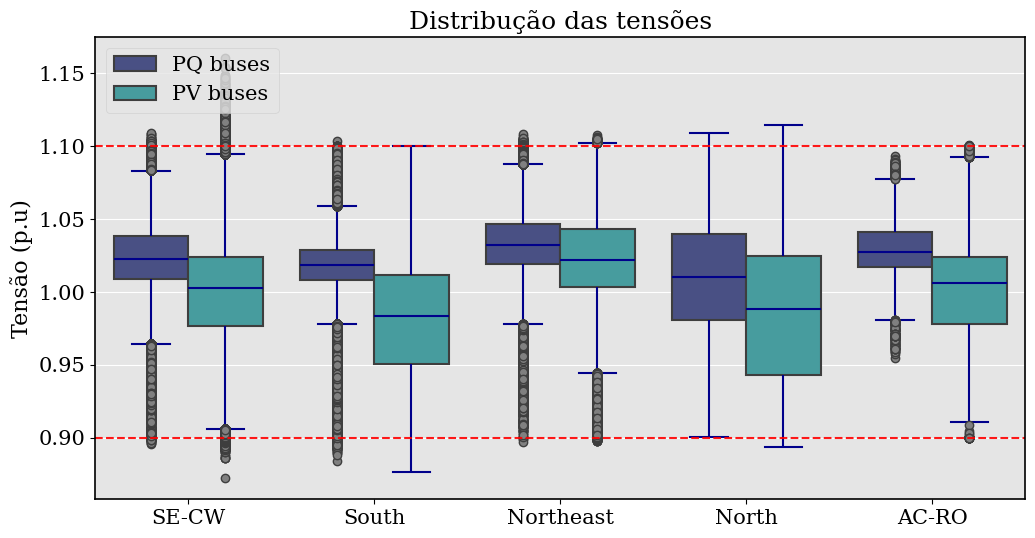

In [17]:
# boxplot_voltage(df_complete[df_complete['Cenario'].isin(['V2A2F5 2026 HPPA','V2A2F5 2026 UNICAMP'])], clase = "REG", titulo = 'Distribução das tensões', xlbl = '')
# boxplot_voltage(df_filt_nt[df_filt_nt['Cenario'].isin(['V2A2F2 2026','V2A2F5 2026'])], clase = "VBASEKV", titulo = 'Distribução das tensões - P.O. Inseguro', xlbl = 'kV')

boxplot_voltage(df_complete, clase = "REG", titulo = 'Distribução das tensões', xlbl = '')
# boxplot_voltage(df_filt_nt, clase = "VBASEKV", titulo = 'Distribução das tensões', xlbl = 'kV')
# boxplot_voltage(df_filt_ger, clase = "Gen_Type", titulo = 'Distribução das tensões', xlbl = 'kV')

In [18]:
print('O numero de pontos Inseguros com Violação de tensão são: ', mask_inseguros.shape[0])

O numero de pontos Inseguros com Violação de tensão são:  1204


In [19]:
df_ger[(df_ger['MODV_PU']<0.8) & (df_ger['Gen_Type']=='UHE')]['key'].unique()

array([], dtype=object)

In [20]:
df_nt[(df_nt['MODV_PU']<0.8) & (df_nt['VBASEKV']==500)]['key'].unique()

array([], dtype=object)

In [21]:
# reg = 'SE-CW'
# tg = 500
# voltage_lev = df_nt[(df_nt['REG']==reg)]['VBASEKV'].unique()
# print(voltage_lev)
# total = df_nt[(df_nt['REG']==reg)].groupby(by=['VBASEKV','BUS_ID']).count().loc[tg].shape[0]
# # vvbuses = df_filt_nt[(df_filt_nt['MODV_PU']>1.10) & (df_filt_nt['REG']==reg) & (df_filt_nt['Cenario'] == 'V2A2F5 2026')].groupby(by=['VBASEKV','BUS_ID']).count().loc[tg].shape[0]
# vvbuses = df_filt_nt[(df_filt_nt['MODV_PU']<0.9) & (df_filt_nt['REG']==reg)].groupby(by=['VBASEKV','BUS_ID']).count().loc[tg].shape[0]
# print(total)
# print(vvbuses)
# print(vvbuses/total*100)
# # # ===============================================================================================
# tg = 'UHE'
# voltage_lev = df_ger[(df_ger['REG']==reg)]['Gen_Type'].unique()
# print(voltage_lev)
# total = df_ger[(df_ger['REG']==reg)].groupby(by=['Gen_Type','BUS_ID']).count().loc[tg].shape[0]
# vvbuses = df_filt_ger[(df_filt_ger['MODV_PU']<0.9) & (df_filt_ger['REG']==reg)].groupby(by=['Gen_Type','BUS_ID']).count().loc[tg].shape[0]

# print(total)
# print(vvbuses)
# print(vvbuses/total*100)

# Analise Indice 2

In [22]:
def plot_line (df_data, column, xlbl, ylbl, title, pathsave = None, clase=None, xlimites=None, ylimites=None, order = False, byClass = False, month = False):
    intense_palette = sns.color_palette(cc.glasbey, n_colors=20)
    fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

    if byClass:
        for idx, clase in enumerate(df_data.index.get_level_values(clase).unique().values):
            if order:
                data = df_data.loc[:, :, clase].sort_values(column, ascending=False)
                axs.plot(data[column].values, color=intense_palette[idx], label=clase, lw=2.5, linestyle='-', alpha=1)
                num = data.shape[0]
                data_points_xaxis = 10
                num_days = num*data_points_xaxis/100
                axs.set_xticks([round(i * num_days) for i in range(data_points_xaxis+1)])
                axs.set_xticklabels([f'{i*10}' for i in range(data_points_xaxis+1)], fontsize=12, rotation=0, ha='center')
            else:
                data = df_data.loc[:, :, clase]
                axs.plot(data['key'], data[column], color=intense_palette[idx], label=clase, lw=2.5, linestyle='-', alpha=1)
                axs.xaxis.set_major_locator(plt.MaxNLocator(28))
            axs.legend(loc='upper right', fontsize=18)
    else:
        if order:
            data = df_data.sort_values(column, ascending=False)
            axs.plot(data[column].values, color=intense_palette[0], lw=2.5, linestyle='-', alpha=1)
            num = data.shape[0]
            data_points_xaxis = 10
            num_days = num*data_points_xaxis/100
            axs.set_xticks([round(i * num_days) for i in range(data_points_xaxis+1)])
            axs.set_xticklabels([f'{i*10}' for i in range(data_points_xaxis+1)], fontsize=12, rotation=0, ha='center')
        else:
            axs.plot(df_data['key'], df_data[column], color=intense_palette[0], lw=2.5, linestyle='-', alpha=1)
            axs.xaxis.set_major_locator(plt.MaxNLocator(28))

    axs.tick_params(axis='y', labelsize=24)
    axs.tick_params(axis='x', labelsize=15, rotation = 45)
    axs.set_xlabel(xlbl, fontsize=18)
    axs.set_ylabel(ylbl, fontsize=22)
    axs.set_title(title, fontsize=22)
    
    if month:
        days = ['Oct {}'.format(i+1) for i in range(28)]
        plt.xticks(ticks=[i*48 for i in range(28)], labels=days, rotation=45)
        plt.xlabel('',fontsize=10)

    if xlimites != None:
        axs.set_xlim(xlimites)
    if ylimites != None:
        axs.set_ylim(ylimites)
        
    axs.grid(True, linestyle='-', linewidth=1.2, alpha=0.4)
    plt.tight_layout()
    plt.show()

In [98]:
n = 2
GB = 'ARE'
def norm(x):
    return (np.sum(x**(2*n)))**(1/(2*n))

def indice_reativo (df, tg):

    if tg == 'Gen_Type':
        df1 = df.groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG', GB]).agg(
            PIq_min = ('ReservaIND', lambda x: norm(x)),
            PIq_max = ('ReservaCAP', lambda x: norm(x)),
        ).reset_index()
    else:
        df1 = df.groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG', GB]).agg(
            PIq_min = ('ReservaINDshunt', lambda x: norm(x)),
            PIq_max = ('ReservaCAPshunt', lambda x: norm(x)),
        ).reset_index()

    return df1

dfqind_PV = indice_reativo(df_ger,'Gen_Type')
dfqind_PQ = indice_reativo(df_nt,'VBASEKV')

In [68]:
n = 2
GB = 'ARE'
dataDetallada = {'PQ Buses': df_nt, 'PV Buses':df_ger}

# Corrección de la función norm
def norm(x):
    return (np.sum(x**(2*n)))**(1/(2*n))

def weightedsum_PQ(x, y, z, NT):
    # Ensure z is not zero to avoid division by zero
    return np.sum(x * y * (NT / 500)) / np.mean(z) if np.sum(z) != 0 else 0

def weightedsum_PV(x, y, z):
    # Ensure z is not zero to avoid division by zero
    return np.sum(x * y) / np.mean(z) if np.sum(z) != 0 else 0

def concatenatedfs(data, num_NB_nonzeros_inf, num_NB_nonzeros_sup, num_NR_inf, num_NR_sup):
    df_merged = data.merge(num_NB_nonzeros_inf.reset_index(),on=['key', 'Dia', 'Hora', 'Cenario', 'REG', GB],how='left')
    df_merged = df_merged.merge(num_NB_nonzeros_sup.reset_index(),on=['key', 'Dia', 'Hora', 'Cenario', 'REG', GB],how='left')
    df_merged = df_merged.merge(num_NR_inf.reset_index(),on=['key', 'Dia', 'Hora', 'Cenario', 'REG'],how='left')
    df_merged = df_merged.merge(num_NR_sup.reset_index(),on=['key', 'Dia', 'Hora', 'Cenario', 'REG'],how='left')
    df_merged.fillna(0, inplace=True)
    return df_merged

for key in dataDetallada.keys():

    num_NB_nonzeros_inf = dataDetallada[key][dataDetallada[key]['IndiceInf']>0].groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG', GB]).agg({'BUS_ID':'count'}).rename(columns = {'BUS_ID':'num_NB_inf'})
    num_NB_nonzeros_sup = dataDetallada[key][dataDetallada[key]['IndiceSup']>0].groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG', GB]).agg({'BUS_ID':'count'}).rename(columns = {'BUS_ID':'num_NB_sup'})
    num_NR_inf = dataDetallada[key].groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG']).agg({'BUS_ID':'count'}).rename(columns = {'BUS_ID':'num_NR_inf'})
    num_NR_sup = dataDetallada[key].groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG']).agg({'BUS_ID':'count'}).rename(columns = {'BUS_ID':'num_NR_sup'})

    if key == 'PQ Buses':
        # Agrupación y cálculo de la norma
        df_PQ = dataDetallada[key].groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG', GB]).agg(
            IndiceInf_s1 = ('IndiceInf', lambda x: norm(x)),
            IndiceSup_s1 = ('IndiceSup', lambda x: norm(x)),
            VBASEKV=('VBASEKV', 'first'),
        ).reset_index()

        df_PQ = concatenatedfs(df_PQ, num_NB_nonzeros_inf, num_NB_nonzeros_sup, num_NR_inf, num_NR_sup)

        df_PQ_area = df_PQ.groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG']).apply(
            lambda df: pd.Series({
                'IndiceInf_s2': weightedsum_PQ(df['IndiceInf_s1'], df['num_NB_inf'], df['num_NR_inf'], df['VBASEKV']),
                'IndiceSup_s2': weightedsum_PQ(df['IndiceSup_s1'], df['num_NB_sup'], df['num_NR_sup'], df['VBASEKV'])
            })
        ).reset_index()

    elif key == 'PV Buses':
        # Agrupación y cálculo de la norma
        df_PV = dataDetallada[key].groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG', GB]).agg(
            IndiceInf_s1 = ('IndiceInf', lambda x: norm(x)),
            IndiceSup_s1 = ('IndiceSup', lambda x: norm(x)),
        ).reset_index()

        df_PV = concatenatedfs(df_PV, num_NB_nonzeros_inf, num_NB_nonzeros_sup, num_NR_inf, num_NR_sup)

        df_PV_area = df_PV.groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG']).apply(
            lambda df: pd.Series({
                'IndiceInf_s2': weightedsum_PV(df['IndiceInf_s1'], df['num_NB_inf'], df['num_NR_inf']),
                'IndiceSup_s2': weightedsum_PV(df['IndiceSup_s1'], df['num_NB_sup'], df['num_NR_sup'])
            })
        ).reset_index()


C:\Users\david\AppData\Local\Temp\ipykernel_27612\2859257416.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_PQ_area = df_PQ.groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG']).apply(
C:\Users\david\AppData\Local\Temp\ipykernel_27612\2859257416.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_PV_area = df_PV.groupby(['key', 'Dia', 'Hora', 'Cenario', 'REG']).apply(


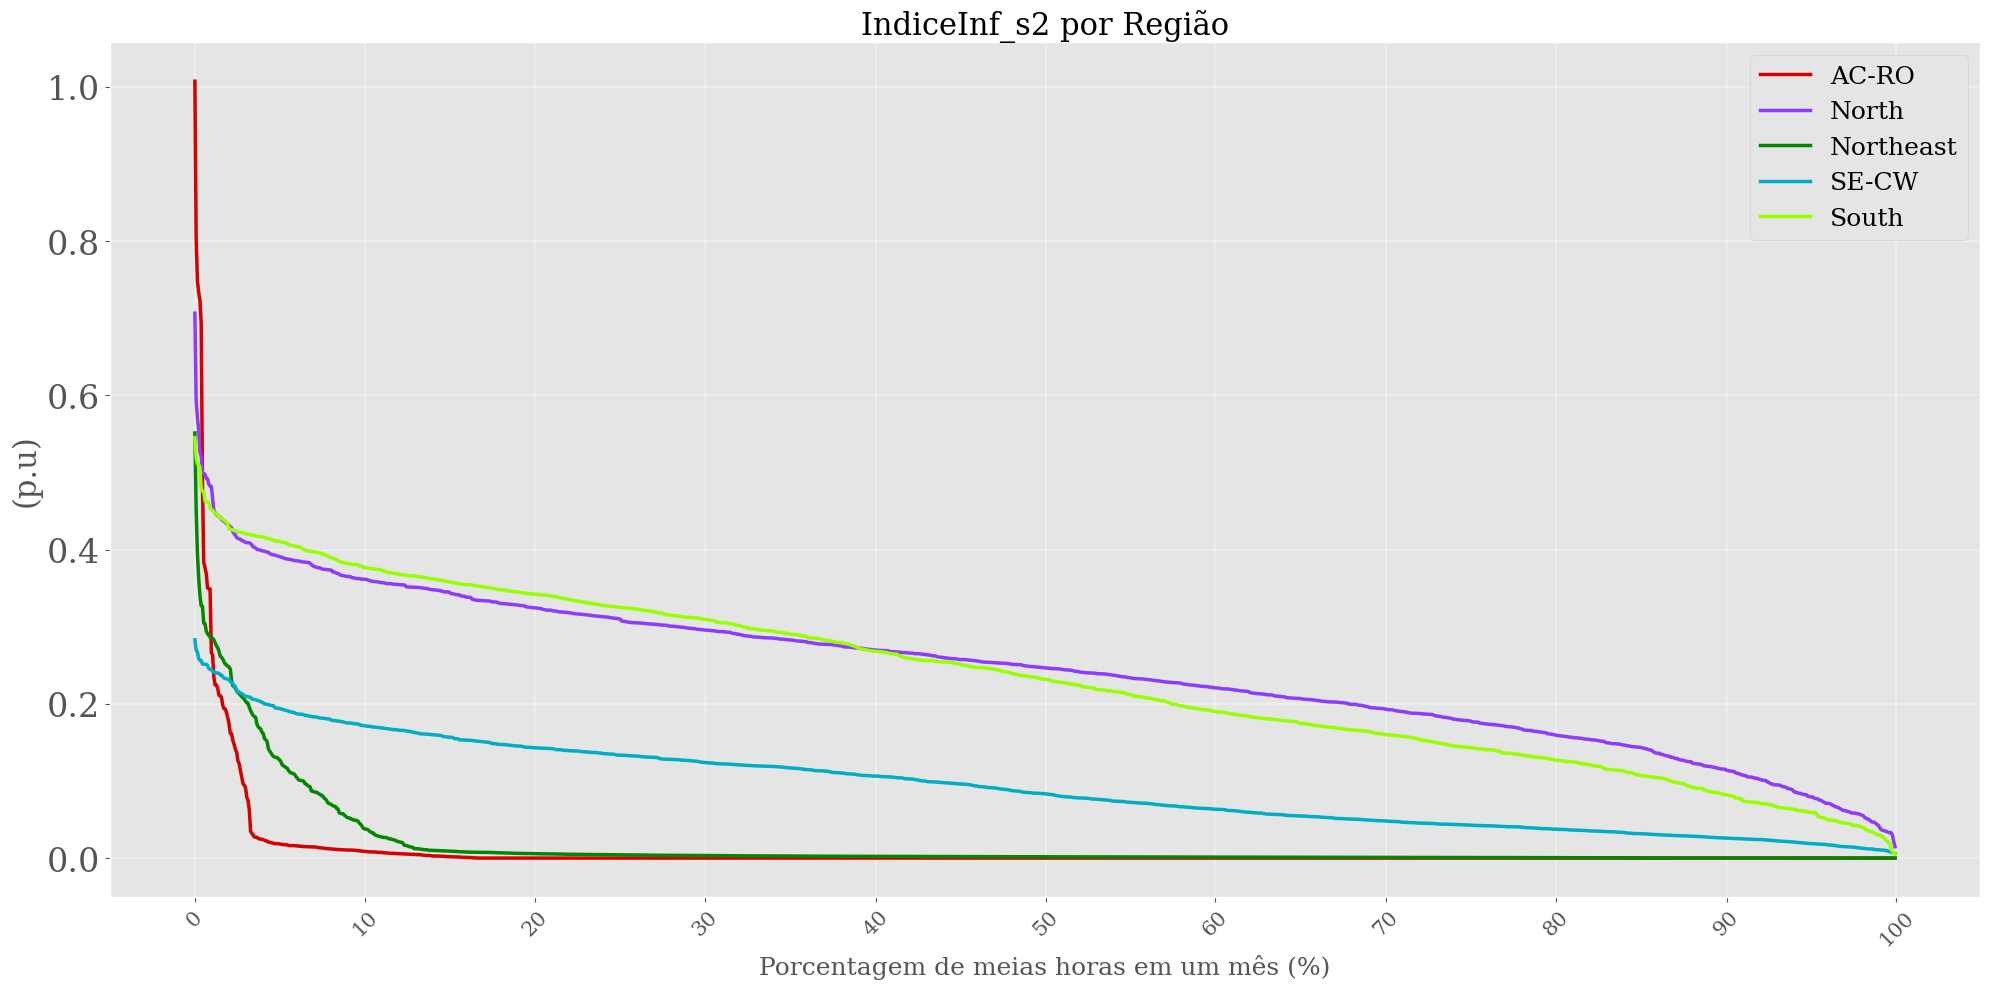

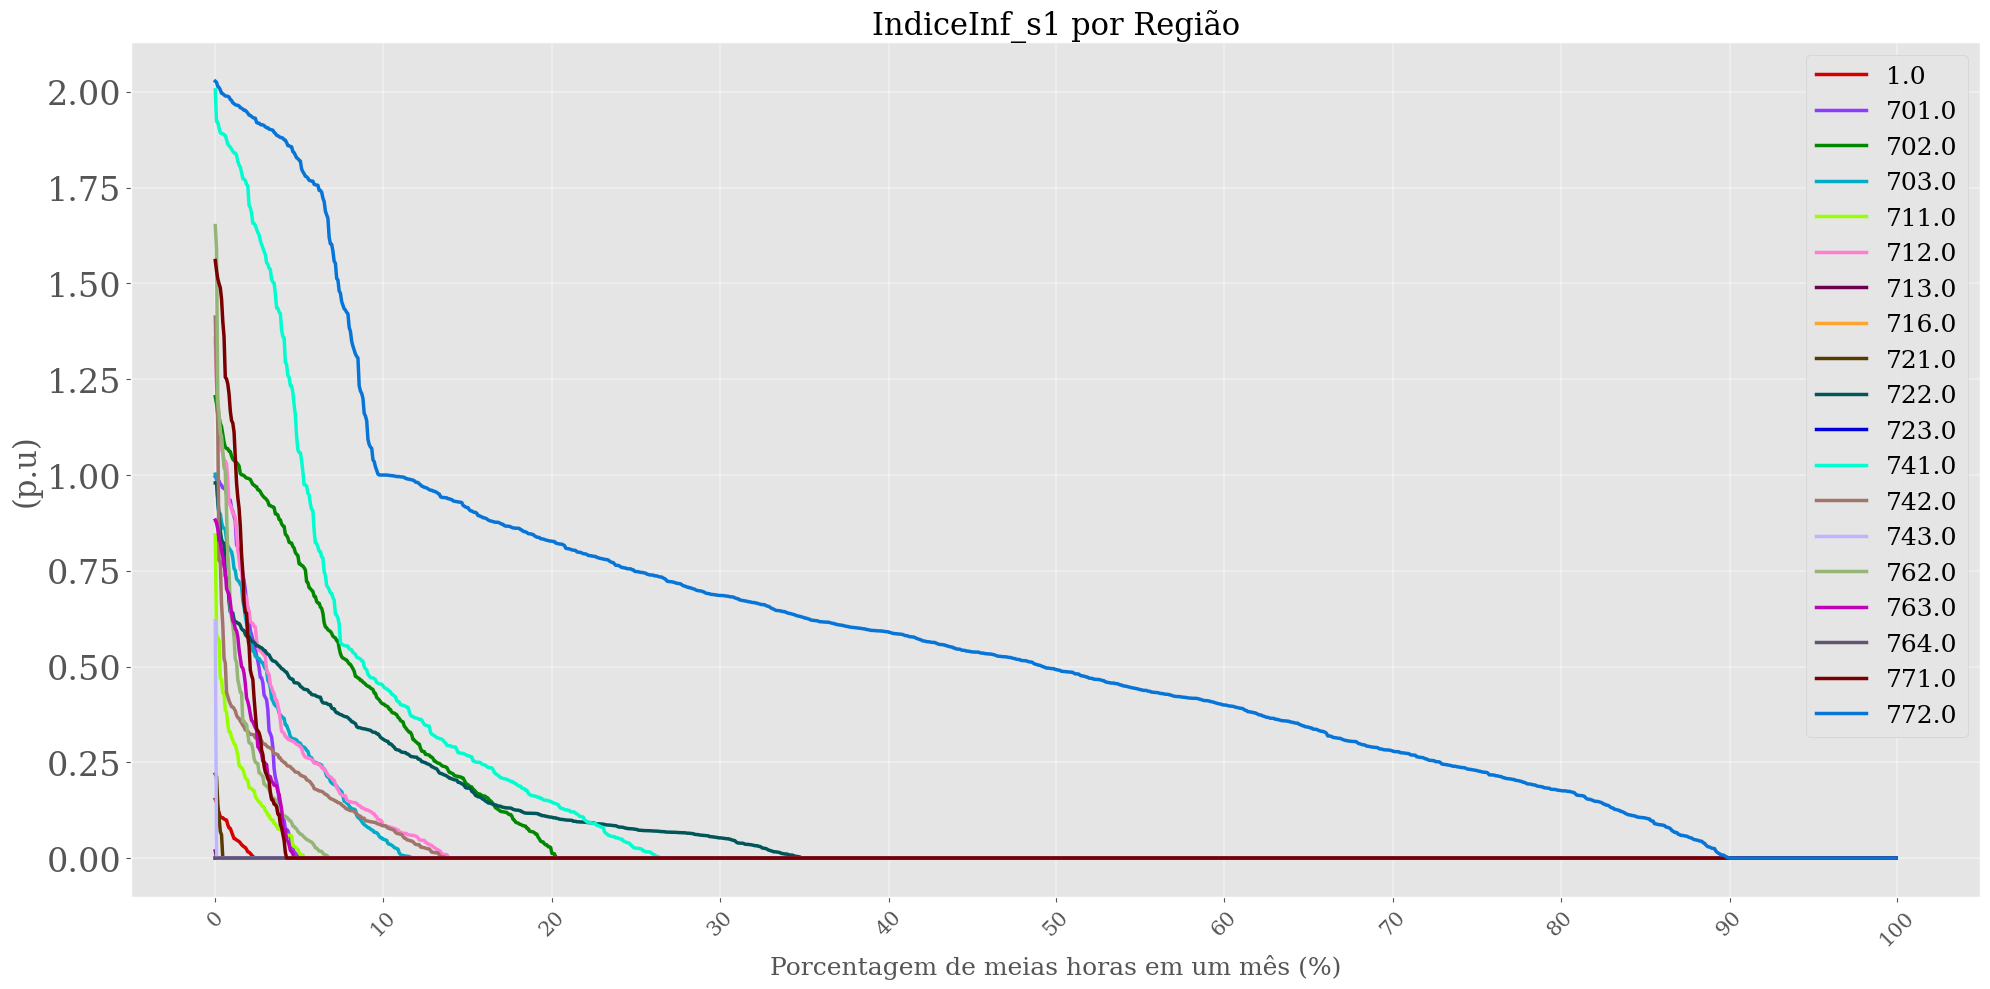

In [72]:
plot_line(df_PV_area.set_index(['Dia','Hora','REG']), 'IndiceInf_s2', 'Porcentagem de meias horas em um mês (%)', '(p.u)', f'IndiceInf_s2 por Região', '',  byClass = True, clase='REG', order=True, month = False)
plot_line(df_PV.set_index(['Dia','Hora','REG',  GB]).loc[:,:, 'Northeast',:], 'IndiceInf_s1', 'Porcentagem de meias horas em um mês (%)', '(p.u)', f'IndiceInf_s1 por Região', '',  byClass = True, clase=GB, order=True, month = False)

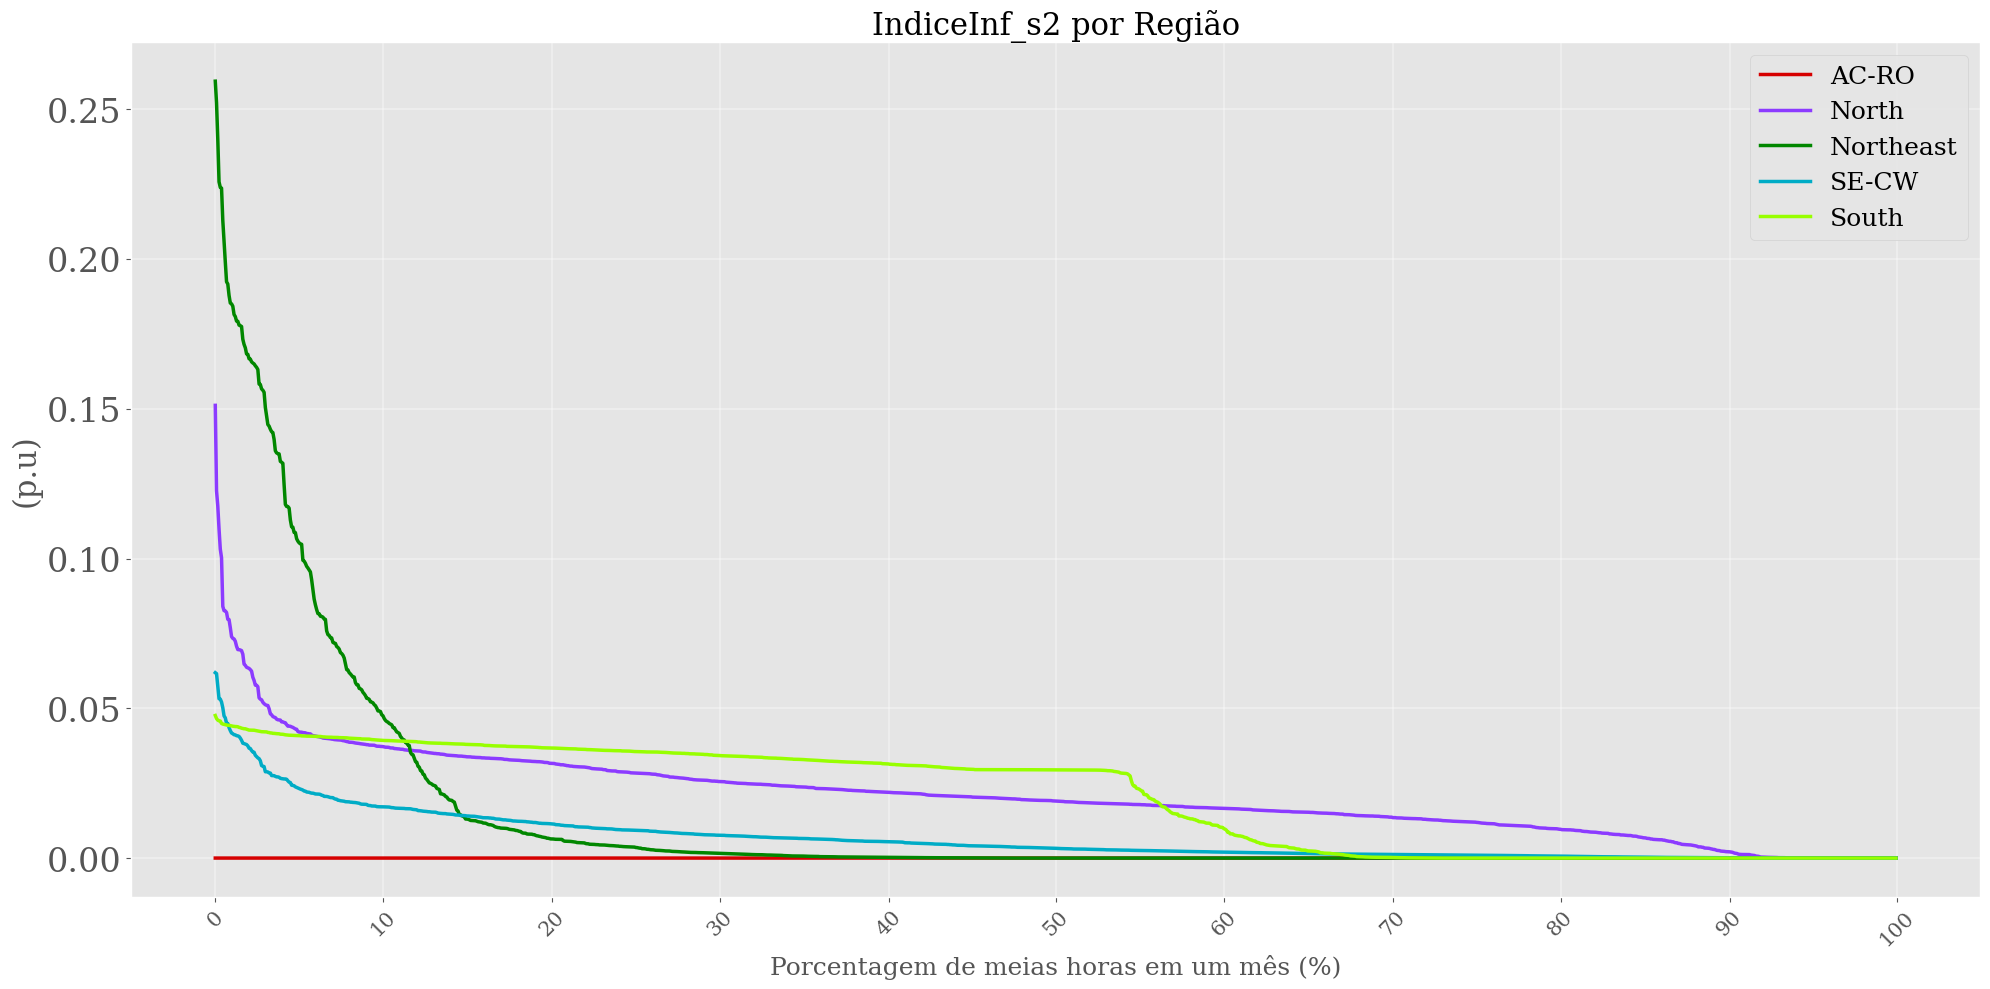

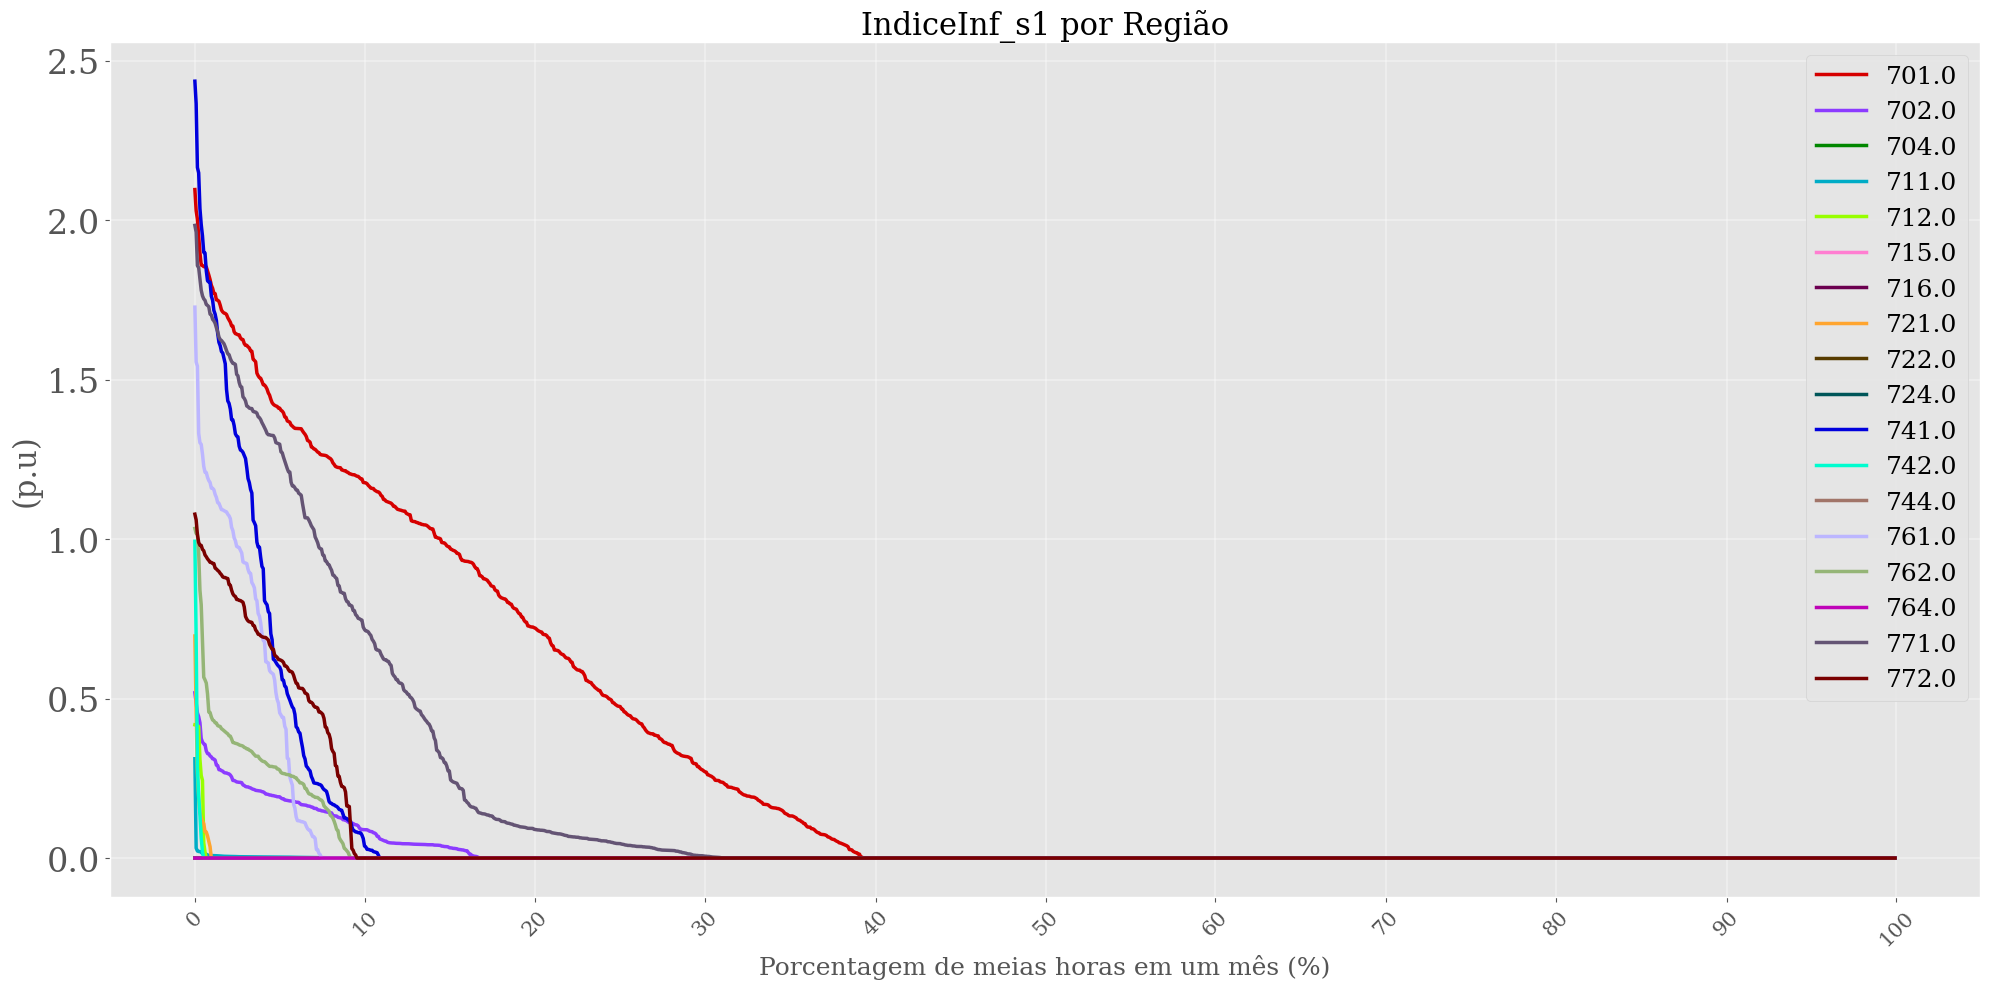

In [73]:
plot_line(df_PQ_area.set_index(['Dia','Hora','REG']), 'IndiceInf_s2', 'Porcentagem de meias horas em um mês (%)', '(p.u)', f'IndiceInf_s2 por Região', '',  byClass = True, clase='REG', order=True, month = False)
plot_line(df_PQ.set_index(['Dia','Hora','REG',  GB]).loc[:,:, 'Northeast',:], 'IndiceInf_s1', 'Porcentagem de meias horas em um mês (%)', '(p.u)', f'IndiceInf_s1 por Região', '',  byClass = True, clase=GB, order=True, month = False)

In [28]:
def separaFERV_Load(df, condition, Load = False ):
    if Load == False:
        dff = df.reset_index().merge(DF_complete_PO[['PG_FERV']], on=['Dia', 'Hora', 'Cenario'], how='left')
        dff = dff[(dff['PG_FERV'] > condition[0]) & (dff['PG_FERV'] <= condition[1])].set_index(['Dia', 'Hora', 'Cenario','REG'])
    else:
        dff = df.reset_index().merge(DF_complete_PO[['PL_MW']], on=['Dia', 'Hora', 'Cenario'], how='left')
        dff = dff[(dff['PL_MW_y'] > condition[0]) & (dff['PL_MW_y'] <= condition[1])].set_index(['Dia', 'Hora', 'Cenario','REG'])   
        dff = dff.drop(columns='PL_MW_y').rename(columns={'PL_MW_x':'PL_MW'})  
    return dff

def reorder_and_filter(df, cenario, region, columns):
    df = df.reorder_levels(['Dia', 'Hora', 'Cenario', 'REG'])[columns]
    if cenario == 'all':
        if region == 'all':
            df_reordered = df
        elif region == 'PO':
            df_reordered = df
        else:
            df_reordered = df.loc[:, :, :, region]
    else:
        if region == 'all':
            df_reordered = df.loc[:, :, cenario, :]
        elif region == 'PO':
            df_reordered = df.loc[:, :, cenario]
        else:
            df_reordered = df.loc[:, :, cenario, region]
    return df_reordered

def set_column_names(datapd, df_reordered_sorted, region):
    if region == 'all':
        columns = []
        for reg in df_reordered_sorted.reset_index('REG')['REG'].unique():
            for column in df_reordered_sorted.columns:
                name = column + '_' + reg
                columns.append(str(name))
        datapd.columns = columns
    return datapd

def merge_data(datapd, df, cenario, key):
    if cenario == 'all':
        return datapd.merge(df, on=['Dia', 'Hora', 'Cenario'], how='left')
    if isinstance(cenario, list):
        return datapd.merge(df.loc[:, :, cenario], on=['Dia', 'Hora', 'Cenario'], how='left')
    return datapd.merge(df.loc[:, :, cenario], on=['Dia', 'Hora'], how='left')

def flatdataframe(df_data_completo, cenario, region, columns, ACDCflux=True, Reserva=False, IndiceGroup=False, DPI=False, InfoPO=False, PImva_reg_nt=False, PImva=False, Busfeatures = False, Vanalysis = None,Linefeatures = False, Q_indice = False):
    """
    Flattens the provided dataframe based on the specified filters and parameters.

    Parameters:
    df_data_completo (pd.DataFrame): The complete dataframe to be flattened.
    cenario (str or list): The scenario to filter by.
    region (str): The region to filter by.
    columns (list): The columns to include in the flattened dataframe.
    ACDCflux (bool): Include AC/DC flux data.
    Reserva (bool): Include reserve data.
    IndiceGroup (bool): Include index group data.
    DPI (bool): Include DPI data.
    InfoPO (bool): Include PO info.
    PImva_reg_nt (bool): Include PImva region NT data.
    PImva (bool): Include PImva data.

    Returns:
    pd.DataFrame: The flattened dataframe.
    """
    df_reordered_sorted = reorder_and_filter(df_data_completo, cenario, region, columns)

    if region == 'all' and cenario == 'all':
        lista = [[index[0], index[1], index[2]] for index in df_reordered_sorted.index]
        conjunto_filtros = set(map(tuple, lista))
        conjunto_filtros = tuple(sorted(conjunto_filtros))
        data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]
        datapd = pd.DataFrame(data, index=conjunto_filtros)
    else:
        datapd = df_reordered_sorted

    datapd = set_column_names(datapd, df_reordered_sorted, region)

    if cenario == 'all':
        datapd.index.set_names(['Dia', 'Hora', 'Cenario'], inplace=True)
    else:
        if isinstance(cenario, list):
            if region == 'all':
                datapd.index.set_names(['Dia', 'Hora', 'Cenario'], inplace=True)
            else:
                datapd.index.set_names(['Dia', 'Hora', 'Cenario', 'REG'], inplace=True)
        else:
            datapd.index.set_names(['Dia', 'Hora'], inplace=True)

    if ACDCflux:
        datapd = merge_data(datapd, DATA['df_Inter_AC_DC'], cenario, 'AC_DC')
    if Reserva:
        datapd = merge_data(datapd, DATA['df_reserva'][[' Reserve']], cenario, 'Reserva')
    if IndiceGroup:
        datapd = merge_data(datapd, DATA['df_indice_group'], cenario, 'IndiceGroup')
    if DPI:
        datapd = merge_data(datapd, DATA['df_DPI'], cenario, 'DPI')
    # if PImva:
    #     datapd = merge_data(datapd, dfl_po[['PI_mva', 'PFI']], cenario, 'PImva')
    # if PImva_reg_nt:
    #     dff = flatdf(dfl_r_nt[['PI_mva', 'PFI']], 'VBASEKV')
    #     datapd = merge_data(datapd, dff, cenario, 'PImva_reg_nt')
    if Q_indice:
        datapd = merge_data(datapd, DATA['df_Qind'], cenario, 'df_Qind')
    if InfoPO:
        column = ['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper', 'PG_MW', 'QG_MVAR', 'PL_MW', 'QL_MVAR', 'Shunt_Ind', 'Shunt_Cap', 'SHUNT_INST_IND',
                    'SHUNT_INST_CAP', 'ReservaIND', 'ReservaCAP', 'PG_BIO', 'PG_Dist', 'QG/QL', 'PG/PL', 'ReservaINDshunt', 'ReservaCAPshunt']
        dfPO = DF_complete_PO.drop(columns=column)
        datapd = merge_data(datapd, dfPO, cenario, 'InfoPO')
    if Busfeatures:
        if Vanalysis == 'OV':
            df_aux = DATA['features_sup_pv_df'].merge(DATA['features_sup_pq_df'], on = ['Dia', 'Hora', 'Cenario'], how='left').set_index(['Dia', 'Hora', 'Cenario'])
            datapd = merge_data(datapd, df_aux, cenario, 'features_sup')
            # datapd = merge_data(datapd, DATA['features_sup_pv_df'], cenario, 'features_sup').set_index(['Dia', 'Hora', 'Cenario'])
            # datapd = merge_data(datapd, DATA['features_sup_pq_df'], cenario, 'features_sup').set_index(['Dia', 'Hora', 'Cenario'])
        elif Vanalysis == 'UV':
            df_aux = DATA['features_inf_pv_df'].merge(DATA['features_inf_pq_df'], on = ['Dia', 'Hora', 'Cenario'], how='left').set_index(['Dia', 'Hora', 'Cenario'])
            datapd = merge_data(datapd, df_aux, cenario, 'features_inf')
            # datapd = merge_data(datapd, DATA['features_inf_pv_df'], cenario, 'features_inf').set_index(['Dia', 'Hora', 'Cenario'])
            # datapd = merge_data(datapd, DATA['features_inf_pq_df'], cenario, 'features_inf').set_index(['Dia', 'Hora', 'Cenario'])
    if Linefeatures:
        datapd = merge_data(datapd, DATA['features_lines'], cenario, 'features_lines').set_index(['Dia', 'Hora', 'Cenario'])

    datapd.columns = datapd.columns.astype(str)
    return datapd

In [29]:
'''
============ Geração RO ================
6822: (PBUEN2PCH138) SISTEMA 138KV
6831: (ROND2-UHE003) SISTEMA 138KV
6832: (ROND2-UTE000) SISTEMA 138KV (TERMICA SEM DADOS DE GERADOR)

6888 (SA-AD1UHE003) - SISTEMA 230KV
6892 (SA-AD2UHE003) - SISTEMA 230KV
6891 (SAMU1-UHE005) - SISTEMA 230KV

6911 (T.NOR1UTE000) - SISTEMA 230KV (TERMICA SEM DADOS DE GERADOR)
6912 (T.N2-GUTE000) - SISTEMA 230KV
6913 (T.N2-VUTE000) - SISTEMA 230KV
============ COMP. SYN ================
ARIQU-SIN001
JIPAR-SIN001
============= Mostra quantas barras Com Violação tem em cada Região ==========

# df_complete[df_complete['MODV_PU']>1.10].groupby(['REG'])['BUS_ID'].unique()
# df_complete[df_complete['MODV_PU']< 0.90].groupby(['REG'])['BUS_ID'].unique()['AC-RO'].shape

#EL FLUJO DE POTENCIA REACTIVA VA DE LA MAIOR TENSIOHN A ALA MENOR TENSION
#El flujo de potencia va de la barra con angulo mas adelantado a la barra con angulo mas atrado

'''

"\n============ Geração RO ================\n6822: (PBUEN2PCH138) SISTEMA 138KV\n6831: (ROND2-UHE003) SISTEMA 138KV\n6832: (ROND2-UTE000) SISTEMA 138KV (TERMICA SEM DADOS DE GERADOR)\n\n6888 (SA-AD1UHE003) - SISTEMA 230KV\n6892 (SA-AD2UHE003) - SISTEMA 230KV\n6891 (SAMU1-UHE005) - SISTEMA 230KV\n\n6911 (T.NOR1UTE000) - SISTEMA 230KV (TERMICA SEM DADOS DE GERADOR)\n6912 (T.N2-GUTE000) - SISTEMA 230KV\n6913 (T.N2-VUTE000) - SISTEMA 230KV\n============ COMP. SYN ================\nARIQU-SIN001\nJIPAR-SIN001\n============= Mostra quantas barras Com Violação tem em cada Região ==========\n\n# df_complete[df_complete['MODV_PU']>1.10].groupby(['REG'])['BUS_ID'].unique()\n# df_complete[df_complete['MODV_PU']< 0.90].groupby(['REG'])['BUS_ID'].unique()['AC-RO'].shape\n\n#EL FLUJO DE POTENCIA REACTIVA VA DE LA MAIOR TENSIOHN A ALA MENOR TENSION\n#El flujo de potencia va de la barra con angulo mas adelantado a la barra con angulo mas atrado\n\n"

In [30]:
def plot_potencia_perfil_2(df_resultado, df_data, column1, column2, ylabel = '(MW)', ylabelrigth = '(P.U)', ylim=None, ylim2=None, markers=True):

    df = df_resultado.merge(df_data, on=['Dia','Hora', 'Cenario'], how='left')
    plt.figure(figsize=(20, 5))
    ax1 = plt.gca()  # get current axes
    for col in column1:
        sns.lineplot(data=df, x='Dia_Hora', y=col, ax=ax1, color='blue', label = col)
        # sns.lineplot(data=df, x='Dia_Hora', y=column1, hue='Cenario', style='Cenario', markers=markers, label = column1)
        
    plt.ylabel(ylabelrigth, fontsize=15)
    value = int(df['Dia_Hora'].unique().shape[0] / 28)
    selected_ticks = df[df['Cenario'] == df['Cenario'].unique()[0]].iloc[::value]['Dia_Hora']
    plt.xlabel('(Dia, Hora)', fontsize=15)
    plt.xticks(selected_ticks, rotation=45, fontsize=12)
    plt.tick_params(axis='y', labelsize=12)
    plt.legend(loc='upper left', fontsize=12)
    # plt.grid(alpha = 1)
    if ylim is not None:
        plt.ylim(ylim)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    for col in column2:
        sns.lineplot(data=df, x='Dia_Hora', y=col, ax=ax2, label = col)  
        # sns.lineplot(data=df, x='Dia_Hora', y=col, ax=ax2, palette="hls", label = col)  
    # sns.lineplot(data=df, x='Dia_Hora', y=column2, hue='Cenario', style='Cenario', markers=markers, label = column2)
    ax2.set_ylabel(ylabel, fontsize=15)  # we already handled the x-label with ax1
    ax2.tick_params(axis='y', labelsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(visible=False)
    if ylim2 is not None:
        plt.ylim(ylim2)

    plt.tight_layout()
    plt.show()

In [31]:
# eloFozibiuna = [85, 86]
# eloPVelArarq = [7055, 7057]
# eloCPVbtbPvel = [7059, 7054]
# eloXinguTR = [8100, 9605]
# eloXinguESTR = [8100, 3010]
# Jirau = [7051, 7061]
# S_Antonio = [7050, 7062, 7064]
# S_Antontonio_ACRO = [6888, 6892, 6891]
# df_complete_t = pd.concat([df_nt, df_ger], axis=0)
# dic_cenarios.keys()

# # ====================================================================================
# # Analise Especifico por Região e grupo de barramentos, escolher o cenario de Analise a Região e as barras a analisar
# target_scenario = 'V1A1F3 Scenario 2026'
# region_ = 'AC-RO'
# buses = eloCPVbtbPvel 
# var = 'B0_MVAR'

# if buses != None:
#     dff_5 = df_complete_t[df_complete_t['BUS_ID'].isin(buses)].groupby(by=['Dia','Hora','Cenario'])[[var]].sum().merge(DATA['df_indice_group'], on=['Dia', 'Hora', 'Cenario'], how='left')
# elif buses == None:
#     dff_5 = df_complete_t.groupby(by=['Dia','Hora','Cenario'])[[var]].sum().merge(DATA['df_indice_group'], on=['Dia', 'Hora', 'Cenario'], how='left')

# DFF5 = dff_5.reset_index()

# plot_potencia_perfil_2(df_mask, DFF5[DFF5['Cenario']==target_scenario], ['PQ_upper'],[var],'(MVAR)', markers=False,)
# plot_potencia_perfil_2(df_mask, DFF5[DFF5['Cenario']==target_scenario], ['PV_upper'],[var],'(MVAR)', markers=False,)


In [32]:
cenario = 'all'
region = 'all'

columns2 = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV', 'PL_MW','PG_MW','QL_MVAR','QG_MVAR','PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL', 'Mvar:Losses_500down','Mvar:Losses_500up','% L1_500up','% L1_500down','Shunt_Ind', 'Shunt_Cap','key','ReservaIND', 'ReservaCAP']
# columns2 = ['key','PL_MW','PG_MW','QL_MVAR','QG_MVAR','PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL', 'Mvar:Losses_500down','Mvar:Losses_500up','% L1_500up','% L1_500down','Shunt_Ind', 'Shunt_Cap']

# insecure_indices = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] > 1).any(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

insecure_indices = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] <= 1).all(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

# insecure_indices = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] >= 0).all(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

# insecure_indices = DF_complete_PO.loc[(DF_complete_PO[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] > 0.2).any(axis=1)]
# insecure_indices = insecure_indices.loc[(insecure_indices[['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper']] <= 1).all(axis=1)].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).values

filtro = Df_data_completo_reg.index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(insecure_indices)
dfanalise = Df_data_completo_reg[filtro]
dfanalise = flatdataframe(dfanalise, cenario, region, columns2, ACDCflux=True, Reserva=True, DPI=True, IndiceGroup=False, InfoPO=True, PImva_reg_nt=False, PImva=False, Busfeatures=False,Vanalysis='OV', Linefeatures=False, Q_indice=True)
dfanalise.shape

(1204, 330)

### Determinar porcetagem de pontos de operação em alarme em cada região.

In [33]:
dfanalise[dfanalise['OV DPI_PV_SE-CW']>0.2].shape[0]/insecure_indices.shape[0]*100

11.295681063122924

## Analise Indice 2.1

In [34]:
def scatterplot_1(df, v1, v2, xlbl, ylbl, lbl_bar = None , v3 = None, xlimites = None, ylimites = None, title = None, vline = False, hline = False):

    cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
    plt.figure(figsize=(10, 6))
    if v3 == None:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, s=60, legend=None)
    else:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, palette=cmap, hue=v3, s=60, legend=None)
        norm = mcolors.Normalize(vmin=df[v3].min(), vmax=df[v3].max())
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=scatter, orientation='vertical', label= lbl_bar,)
        # Set color bar tick labels to black
        cbar.ax.yaxis.set_tick_params(color='black',labelsize=12)
        plt.setp(cbar.ax.get_yticklabels(), color='black')
        # Set the color and size of the color bar legend label
        cbar.set_label(lbl_bar, fontsize=15, color='black')

    # plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    nometitulo = title
    plt.title(nometitulo, fontsize = 15)
    plt.xlabel(xlbl, fontsize = 17, color ='black')
    plt.legend(fontsize = 15, loc='upper left')
    plt.ylabel(ylbl, fontsize = 17, color ='black')
    if hline:
        plt.axhline(1, color='red', linestyle='--', alpha=0.9)
    if vline:
        plt.axvline(1, color='red', linestyle='--', alpha=0.9)
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')
    plt.tick_params(axis='x', colors='black',labelsize=15, rotation = 0)  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks
    if xlimites != None:
        plt.xlim(xlimites)
    if ylimites != None:
        plt.ylim(ylimites)
    # if namedir != None:
        # nome = folderimg+'Correlações/' + namedir + nometitulo + '.svg'
        # # plt.savefig(nome)
        # nome = folderimg+'Correlações/' + namedir + nometitulo + '.png'
        # # plt.savefig(nome)
    plt.show()

    correlation = df[v1].corr(df[v2])
    print(f"Indice de Correlación: {correlation}")
    
# scatterplot(dfanalise, 'Mvar:Losses_500down_North', 'UV DPI_PV_North', 'B_Monte_MW')
# scatterplot(dfanalise, 'Elo_XINGU-SE', 'UV DPI_PV_North', 'Mvar:Losses_500down_North')
# scatterplot(dfanalise, 'Mvar:Losses_500up_South', 'UV DPI_PV_SE-CW', 'QL_MVAR_SE-CW')
# scatterplot(dfanalise, 'QL_MVAR_North', 'UV DPI_PV_SE-CW', 'PL_MW_SE-CW')

# scatterplot_1(dfanalise, 'Fluxo_NE-SE','OV DPI_PV_North',)
# scatterplot_1(dfanalise, '% L1_500down_Northeast','OV DPI_PV_Northeast', 'Mvar:Losses_500down_Northeast')

In [99]:
df_PV

key  Dia   Hora      Cenario    REG    ARE  IndiceInf_s1  \
0       D_10_H_00-00   10  00-00  V1A1F2 2026  AC-RO  452.0        0.0000   
1       D_10_H_00-00   10  00-00  V1A1F2 2026  AC-RO  459.0        0.0000   
2       D_10_H_00-00   10  00-00  V1A1F2 2026  North  582.0        0.0000   
3       D_10_H_00-00   10  00-00  V1A1F2 2026  North  583.0        0.0000   
4       D_10_H_00-00   10  00-00  V1A1F2 2026  North  701.0        0.0000   
...              ...  ...    ...          ...    ...    ...           ...   
154555   D_9_H_23-30    9  23-30  V1A1F2 2026  South  103.0        0.9488   
154556   D_9_H_23-30    9  23-30  V1A1F2 2026  South  105.0        0.0000   
154557   D_9_H_23-30    9  23-30  V1A1F2 2026  South  241.0        0.0000   
154558   D_9_H_23-30    9  23-30  V1A1F2 2026  South  302.0        0.0000   
154559   D_9_H_23-30    9  23-30  V1A1F2 2026  South  304.0        0.0000   

        IndiceSup_s1  num_NB_inf  num_NB_sup  num_NR_inf  num_NR_sup  
0            0.00000         0.0         0.0          15          15  
1            0.00000         0.0         0.0          15          15  
2            0.00000         0.0         0.0          90          90  
3            1.00238         0.0         1.0          90          90  
4            0.00000         0.0         0.0          90          90  
...              ...         ...         ...         ...         ...  
154555       0.00000         1.0         0.0         112         112  
154556       0.00000         0.0         0.0         112         112  
154557       0.00000         0.0         0.0         112         112  
154558       0.00000         0.0         0.0         112         112  
154559       0.00000         0.0         0.0         112         112  

[154560 rows x 12 columns]

In [100]:
dfqind_PV

key  Dia   Hora      Cenario    REG    ARE   PIq_min  \
0       D_10_H_00-00   10  00-00  V1A1F2 2026  AC-RO  452.0  0.000000   
1       D_10_H_00-00   10  00-00  V1A1F2 2026  AC-RO  459.0  0.148200   
2       D_10_H_00-00   10  00-00  V1A1F2 2026  North  582.0  0.723200   
3       D_10_H_00-00   10  00-00  V1A1F2 2026  North  583.0  0.000000   
4       D_10_H_00-00   10  00-00  V1A1F2 2026  North  701.0  0.731565   
...              ...  ...    ...          ...    ...    ...       ...   
154555   D_9_H_23-30    9  23-30  V1A1F2 2026  South  103.0  0.910000   
154556   D_9_H_23-30    9  23-30  V1A1F2 2026  South  105.0  0.000000   
154557   D_9_H_23-30    9  23-30  V1A1F2 2026  South  241.0  0.000000   
154558   D_9_H_23-30    9  23-30  V1A1F2 2026  South  302.0  0.090146   
154559   D_9_H_23-30    9  23-30  V1A1F2 2026  South  304.0  0.000000   

         PIq_max  
0       0.137045  
1       0.000000  
2       0.000000  
3       0.654300  
4       0.407009  
...          ...  
154555  0.000000  
154556  0.000000  
154557  0.311400  
154558  0.000000  
154559  0.000000  

[154560 rows x 8 columns]

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


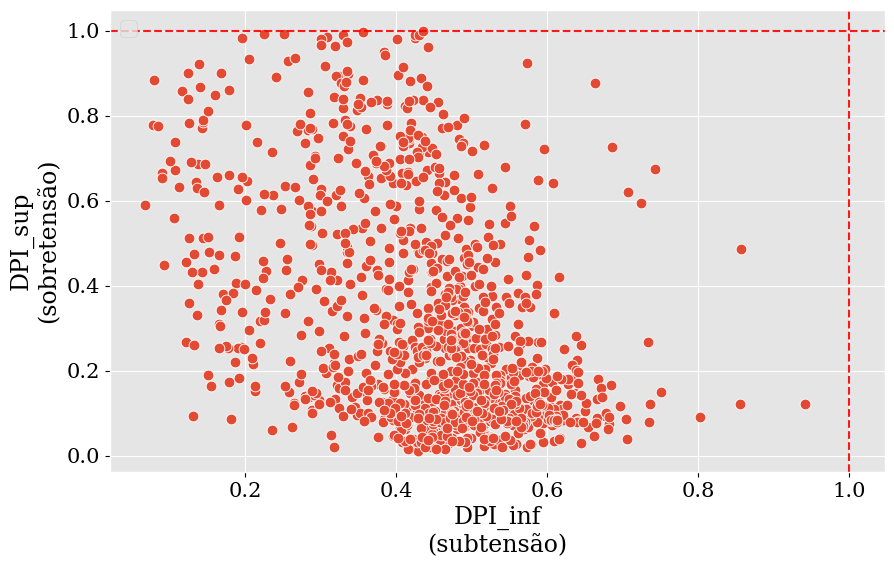

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: -0.44975068464104867


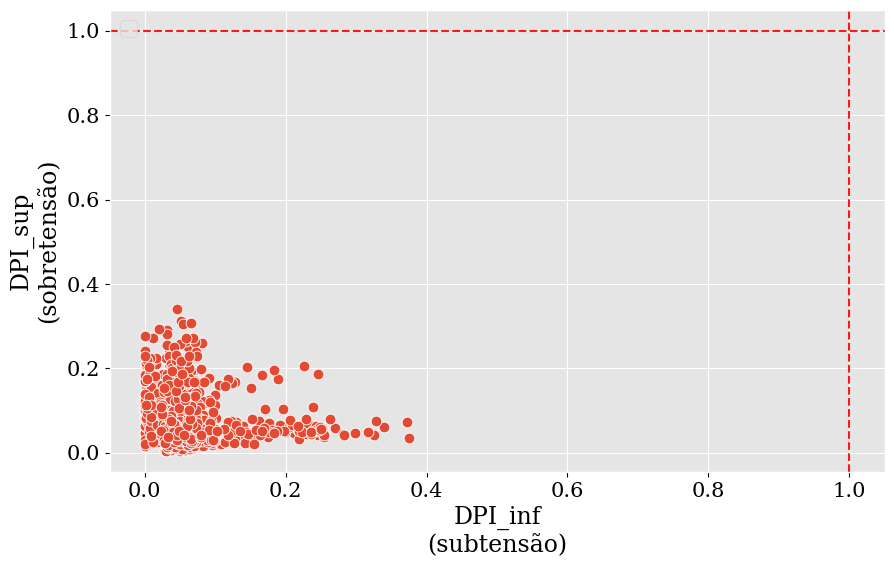

Indice de Correlación: -0.12147799533301606


In [35]:
filtro = DF_complete_PO.index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(insecure_indices)
DF_complete_PO_filt = DF_complete_PO[filtro]
scatterplot_1(DF_complete_PO_filt, 'PV_lower', 'PV_upper', xlbl='DPI_inf\n(subtensão)', ylbl = 'DPI_sup\n(sobretensão)',lbl_bar= 'Demanda Liquida (MW)', vline=True, hline=True , title='')
scatterplot_1(DF_complete_PO_filt, 'PQ_lower', 'PQ_upper', xlbl='DPI_inf\n(subtensão)', ylbl = 'DPI_sup\n(sobretensão)',lbl_bar= 'FERV (%)', vline=True, hline=True , title='')

# scatterplot_1(DF_complete_PO_filt, 'PV_lower', 'PV_upper', xlbl='DPI_inf', ylbl = 'DPI_sup',lbl_bar= 'Demanda Liquida (MW)', v3 = 'DL_MW', vline=True, hline=True , title='')
# scatterplot_1(DF_complete_PO_filt, 'PV_lower', 'PV_upper', xlbl='DPI_inf', ylbl = 'DPI_sup',lbl_bar= 'FERV (%)', v3 = 'PG_FERV', vline=True, hline=True , title='')

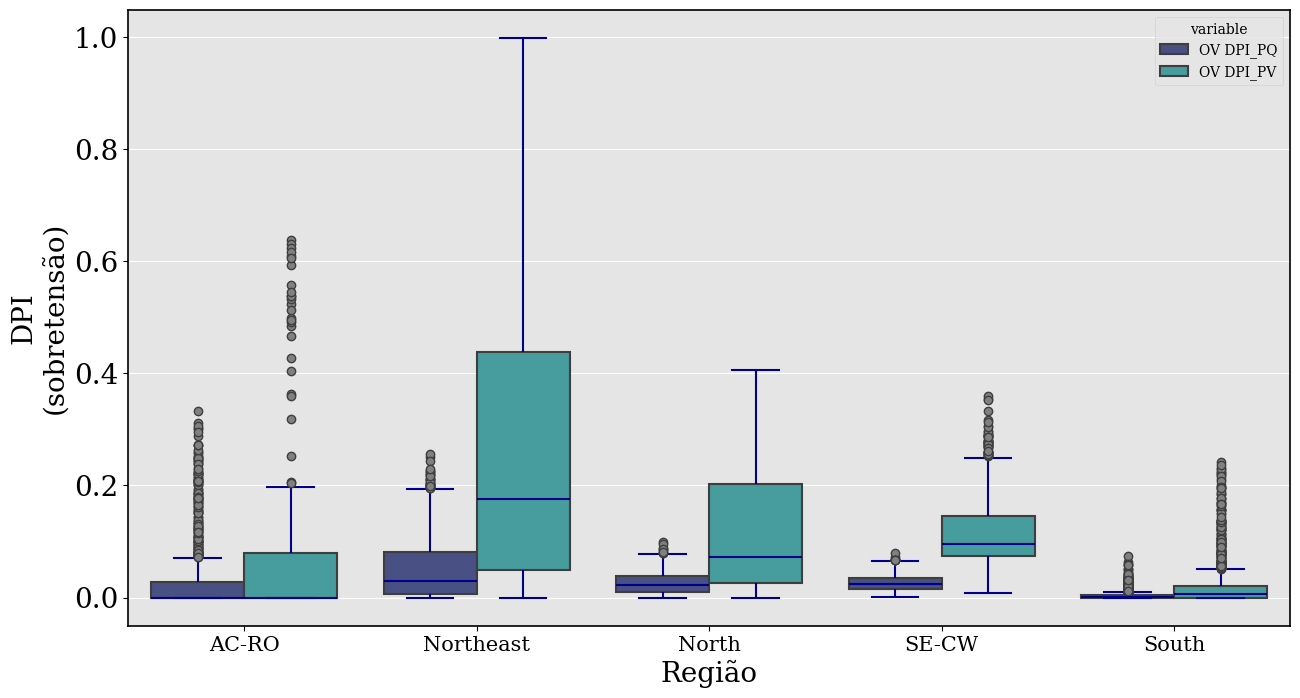

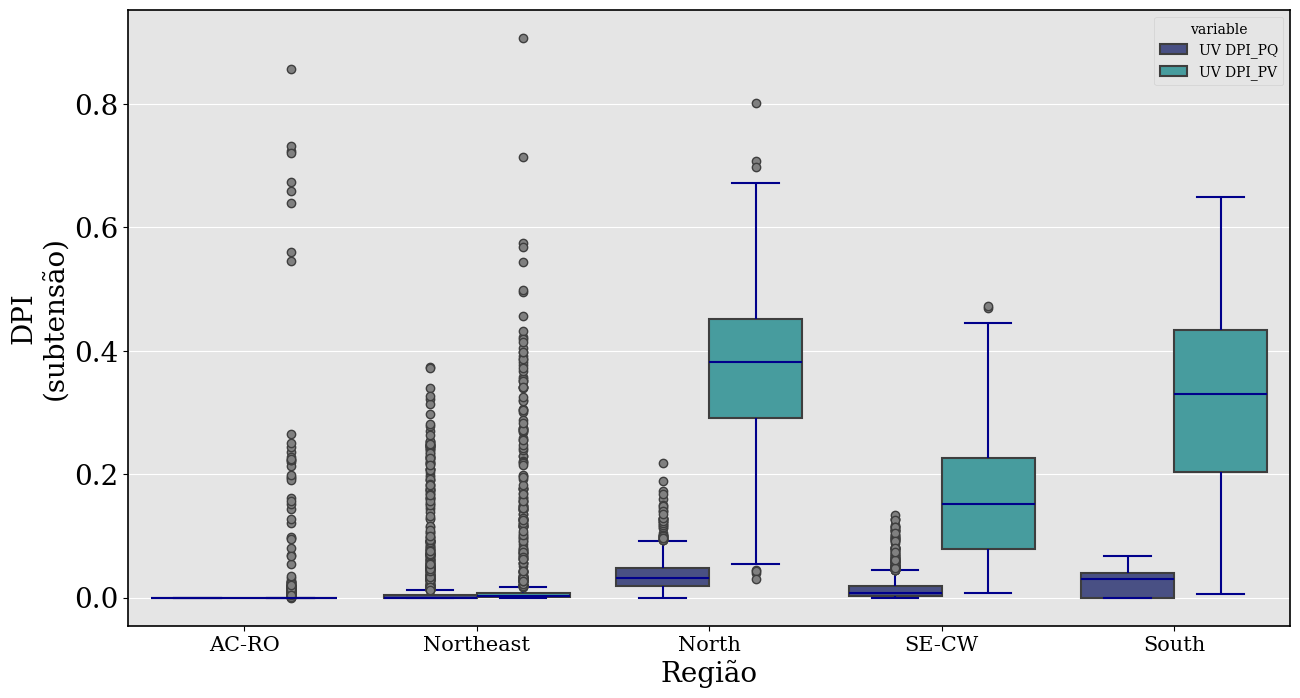

In [36]:
filtro = Df_data_completo_reg.index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(insecure_indices)
df = pd.melt(Df_data_completo_reg[filtro][['OV DPI_PQ','OV DPI_PV']].reset_index(), id_vars=['REG'], value_vars=['OV DPI_PQ','OV DPI_PV'], ignore_index = False)
boxplot_(df,'value', 'REG', '', 'Região', 'DPI\n(sobretensão)', hue="variable")

df = pd.melt(Df_data_completo_reg[filtro][['UV DPI_PQ','UV DPI_PV']].reset_index(), id_vars=['REG'], value_vars=['UV DPI_PQ','UV DPI_PV'], ignore_index = False)
boxplot_(df,'value', 'REG', '', 'Região', 'DPI\n(subtensão)', hue="variable")

In [37]:
columns = [col  for col in DATA['df_DPI'].columns if 'inf_North_' in col]
print(columns[2:])
filtro = DATA['df_DPI'].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(insecure_indices)
pd.melt(DATA['df_DPI'][filtro][columns[2:]].reset_index(), value_vars=columns[2:], ignore_index = False)

['DPI_inf_North_EOL', 'DPI_inf_North_SIN', 'DPI_inf_North_UFV', 'DPI_inf_North_UHE', 'DPI_inf_North_UTE']


variable     value
0     DPI_inf_North_EOL  0.000000
1     DPI_inf_North_EOL  0.000000
2     DPI_inf_North_EOL  0.000000
3     DPI_inf_North_EOL  0.000000
4     DPI_inf_North_EOL  0.000000
...                 ...       ...
1199  DPI_inf_North_UTE  1.039902
1200  DPI_inf_North_UTE  1.030123
1201  DPI_inf_North_UTE  0.994912
1202  DPI_inf_North_UTE  1.064848
1203  DPI_inf_North_UTE  1.057489

[6020 rows x 2 columns]

['DPI_sup_North_EOL', 'DPI_sup_North_SIN', 'DPI_sup_North_UFV', 'DPI_sup_North_UHE', 'DPI_sup_North_UTE']


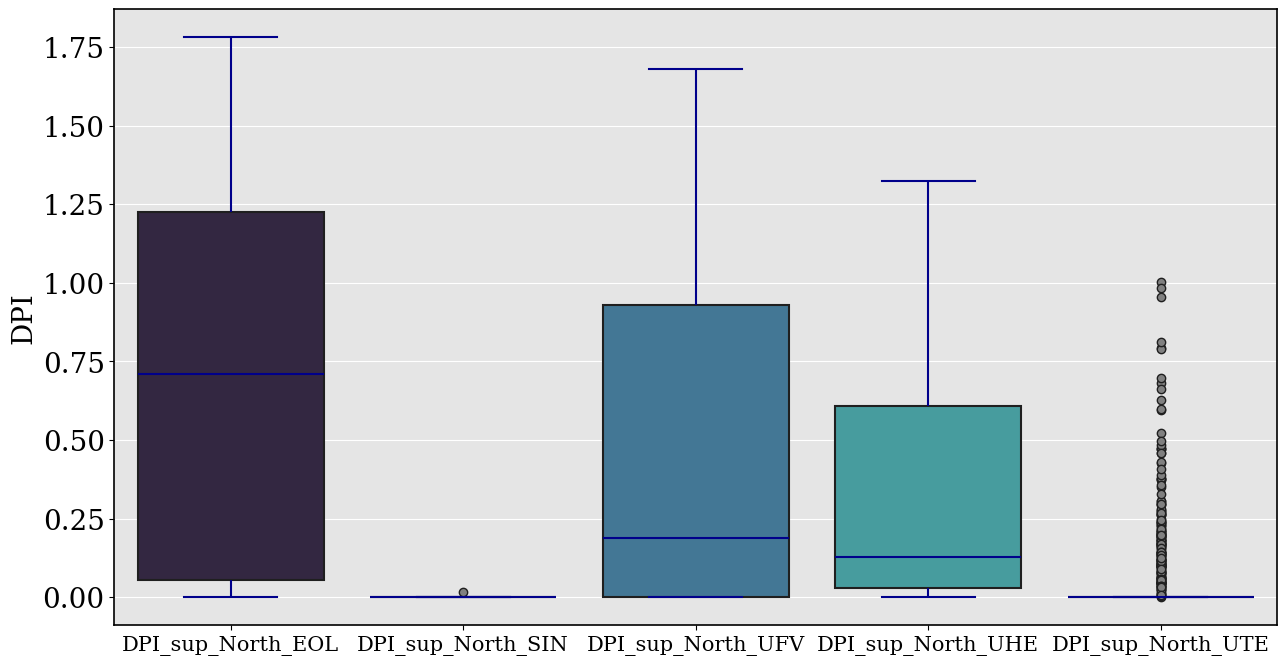

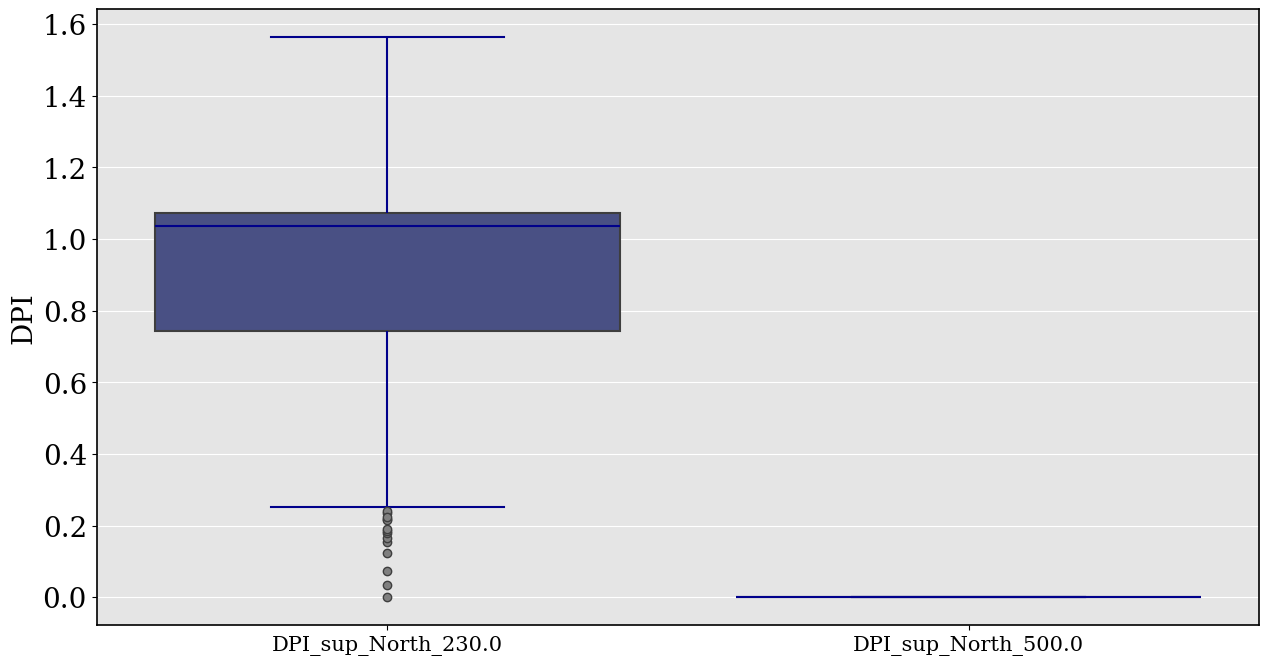

In [38]:
columns = [col  for col in DATA['df_DPI'].columns if 'sup_North_' in col]
print(columns[2:])
filtro = DATA['df_DPI'].index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(insecure_indices)

df = pd.melt(DATA['df_DPI'][filtro][columns[2:]].reset_index(), value_vars=columns[2:], ignore_index = False)
boxplot_(df,'value', 'variable', '', '', 'DPI', hue="variable")

df = pd.melt(DATA['df_DPI'][filtro][columns[:2]].reset_index(), value_vars=columns[:2], ignore_index = False)
boxplot_(df,'value', 'variable', '', '', 'DPI', hue="variable")

In [39]:
df_PQ_area

key  Dia   Hora      Cenario        REG  IndiceInf_s2  \
0     D_10_H_00-00   10  00-00  V1A1F2 2026      AC-RO      0.000000   
1     D_10_H_00-00   10  00-00  V1A1F2 2026      North      0.000184   
2     D_10_H_00-00   10  00-00  V1A1F2 2026  Northeast      0.018882   
3     D_10_H_00-00   10  00-00  V1A1F2 2026      SE-CW      0.019024   
4     D_10_H_00-00   10  00-00  V1A1F2 2026      South      0.038408   
...            ...  ...    ...          ...        ...           ...   
6715   D_9_H_23-30    9  23-30  V1A1F2 2026      AC-RO      0.000000   
6716   D_9_H_23-30    9  23-30  V1A1F2 2026      North      0.000080   
6717   D_9_H_23-30    9  23-30  V1A1F2 2026  Northeast      0.009760   
6718   D_9_H_23-30    9  23-30  V1A1F2 2026      SE-CW      0.013025   
6719   D_9_H_23-30    9  23-30  V1A1F2 2026      South      0.005314   

      IndiceSup_s2  
0         0.047363  
1         0.006883  
2         0.014653  
3         0.010319  
4         0.000000  
...            ...  
6715      0.000000  
6716      0.005012  
6717      0.019391  
6718      0.018967  
6719      0.000000  

[6720 rows x 7 columns]

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


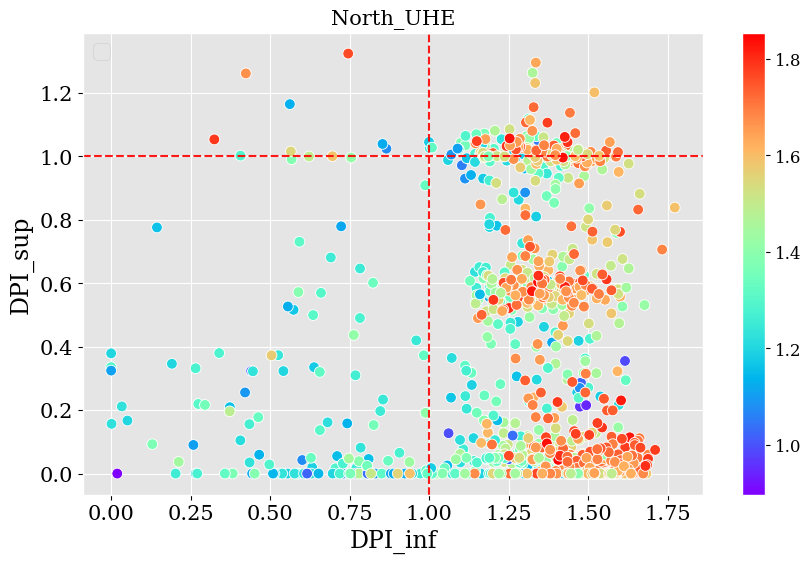

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: -0.05616070176213419


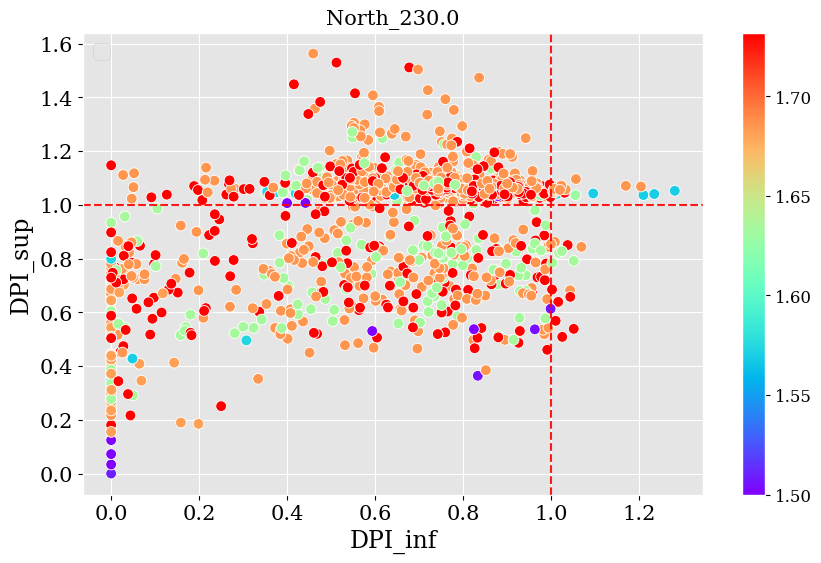

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.4542474638822291


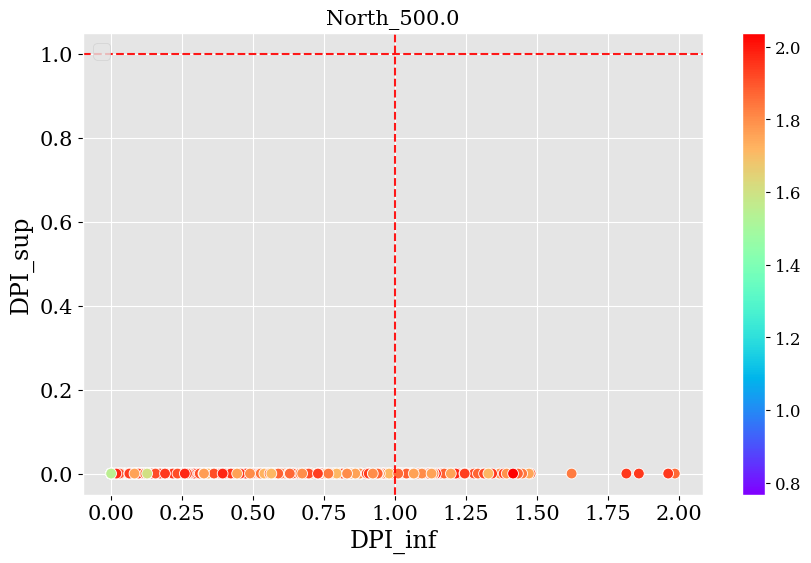

Indice de Correlación: nan


c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [40]:
Region = 'North'
gengroups = ['UHE','230.0','500.0']
# gengroups = ['UHE']
grupos = set([word.replace('Qmin_norm_', '').replace('Qmax_norm_', '') for word in DATA['df_Qind'].columns])
for j in gengroups:
    for i in grupos:
        textaux = Region + '_' + j
        if textaux in i:
            scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_sup_{textaux}',xlbl='DPI_inf', ylbl = 'DPI_sup',lbl_bar= '', v3=f'Qmin_norm_{textaux}', vline=True, hline=True , title=textaux)


            # scatterplot_1(dfanalise, f'Qmax_norm_{textaux}',f'Qmin_norm_{textaux}',xlbl='Qmax', ylbl = 'Qmin',lbl_bar= 'DPI_sup', v3=f'DPI_sup_{textaux}', vline=True, hline=True , title=textaux)
            # scatterplot_1(dfanalise, f'Qmax_norm_{textaux}',f'Qmin_norm_{textaux}',xlbl='Qmax', ylbl = 'Qmin',lbl_bar= 'DPI_inf', v3=f'DPI_inf_{textaux}', vline=True, hline=True , title=textaux)

            # scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_sup_{Region}_230.0',xlbl=f'DPI_inf_{textaux}', ylbl = f'DPI_sup_{Region}_230.0',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', vline=True, hline=True , title=f'{Region}_230.0')
            # scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_inf_{Region}_230.0',xlbl=f'DPI_inf_{textaux}', ylbl = f'DPI_inf_{Region}_230.0',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', vline=True, hline=True , title=f'{Region}_230.0')

            # scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_sup_{Region}_500.0',xlbl=f'DPI_inf_{textaux}', ylbl = f'DPI_sup_{Region}_500.0',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', vline=True, hline=True , title=f'{Region}_500.0')
            # scatterplot_1(dfanalise, f'DPI_inf_{textaux}',f'DPI_inf_{Region}_500.0',xlbl=f'DPI_inf_{textaux}', ylbl = f'DPI_inf_{Region}_500.0',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', vline=True, hline=True , title=f'{Region}_500.0')

            # scatterplot_1(dfanalise, f'PL_MW_{Region}',f'DPI_sup_{textaux}',xlbl='MW Load', ylbl = 'DPI_sup',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', hline=True , title=textaux)
            # scatterplot_1(dfanalise, f'PL_MW_{Region}',f'DPI_inf_{textaux}',xlbl='MW Load', ylbl = 'DPI_inf',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', hline=True , title=textaux)
            # scatterplot_1(dfanalise, f'PL_MW_{Region}',f'DPI_sup_{textaux}',xlbl='MW Load', ylbl = 'DPI_sup',lbl_bar= 'Qmax_index', v3=f'Qmax_norm_{textaux}', hline=True , title=textaux)
            # scatterplot_1(dfanalise, f'PL_MW_{Region}',f'DPI_inf_{textaux}',xlbl='MW Load', ylbl = 'DPI_inf',lbl_bar= 'Qmax_index', v3=f'Qmax_norm_{textaux}', hline=True , title=textaux)

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


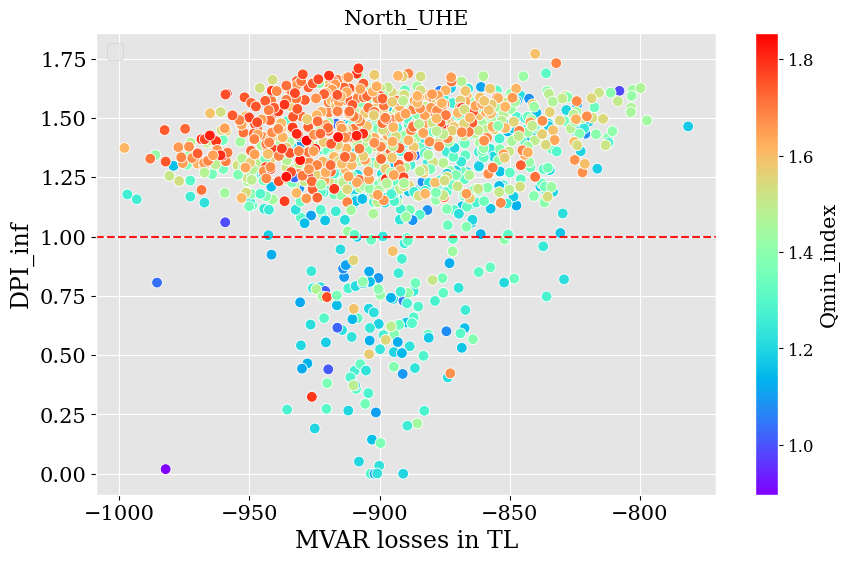

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap


Indice de Correlación: 0.10375084362614762


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


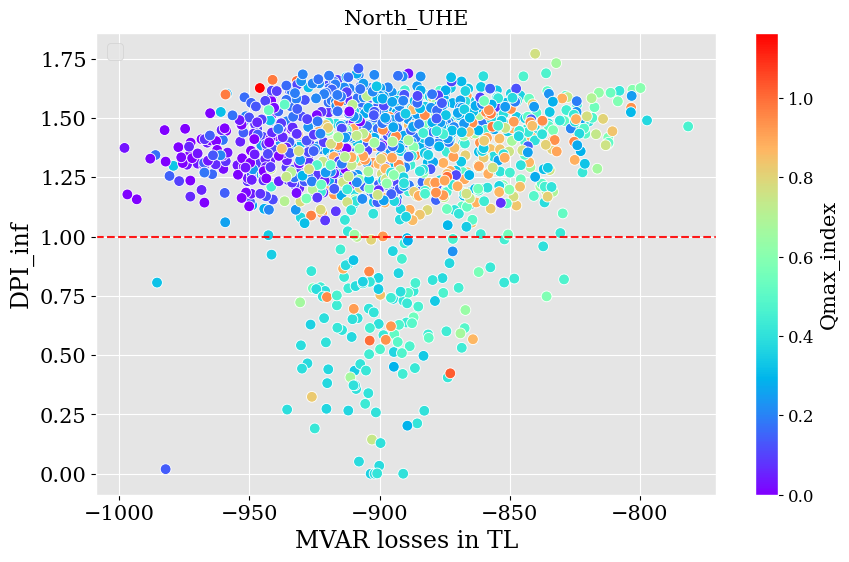

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.10375084362614762


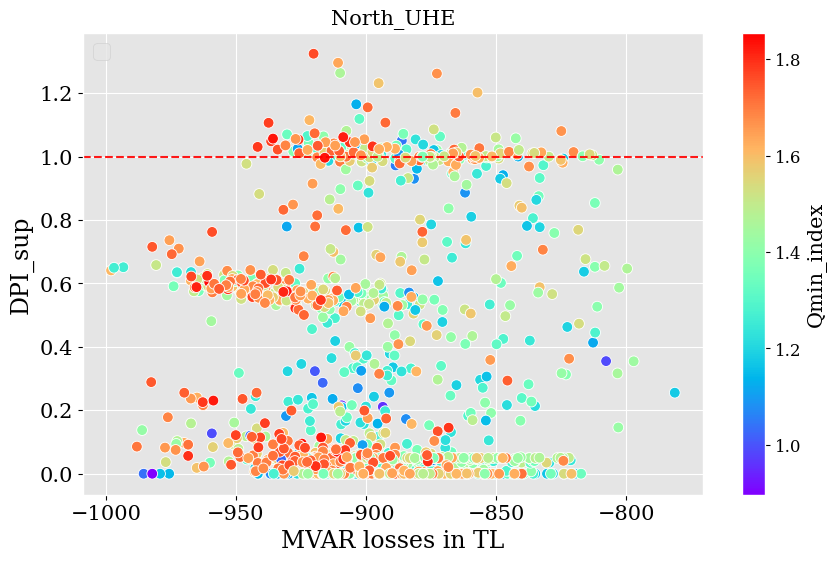

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: -0.005273086014546053


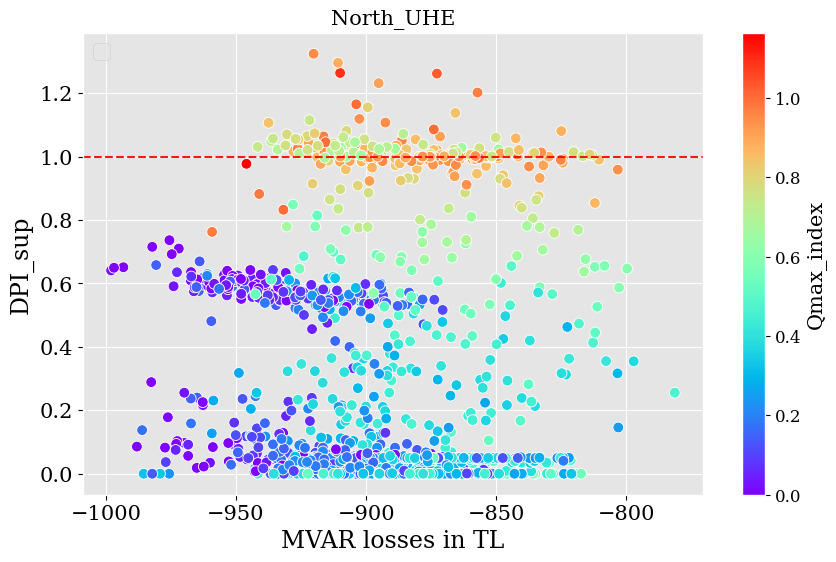

Indice de Correlación: -0.005273086014546053


C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


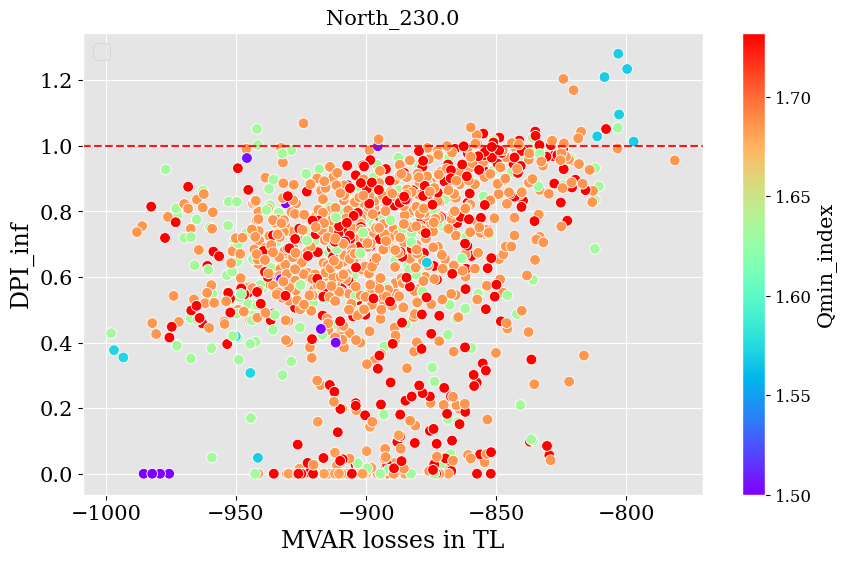

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.22800989612702482


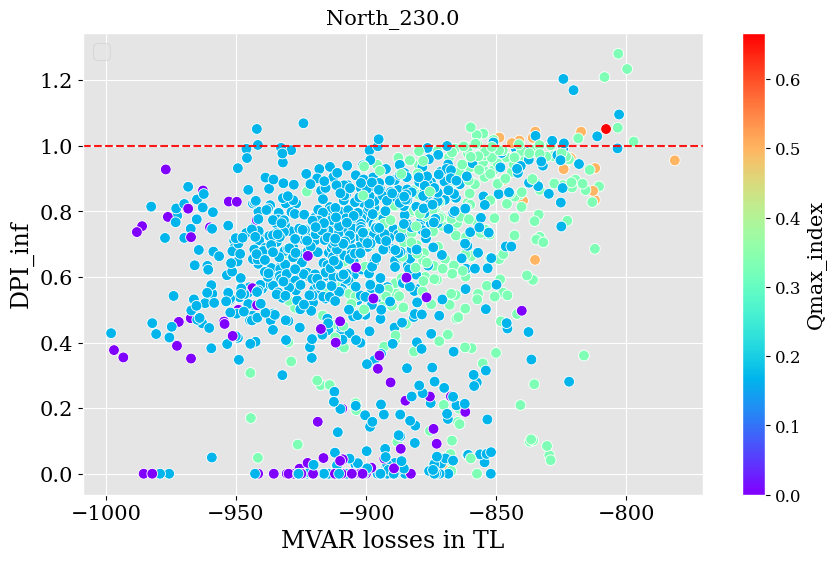

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.22800989612702482


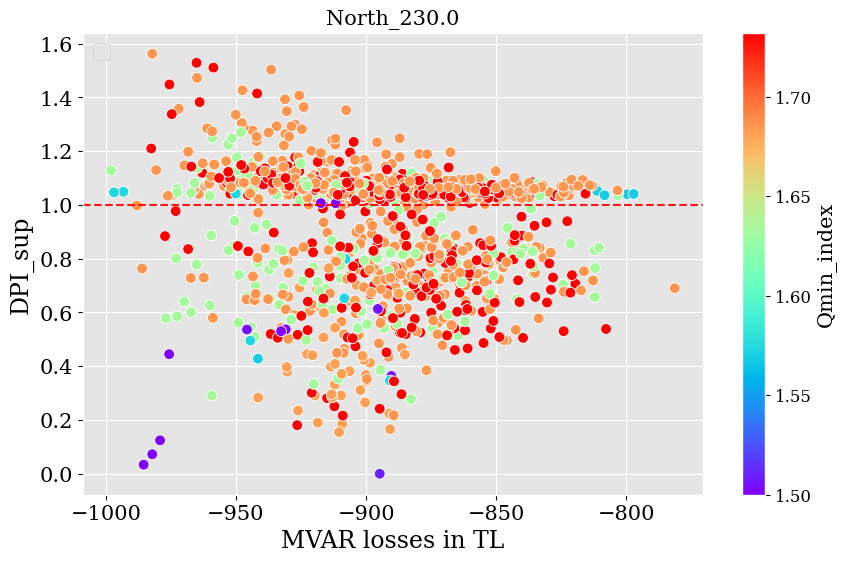

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: -0.1241973351662287


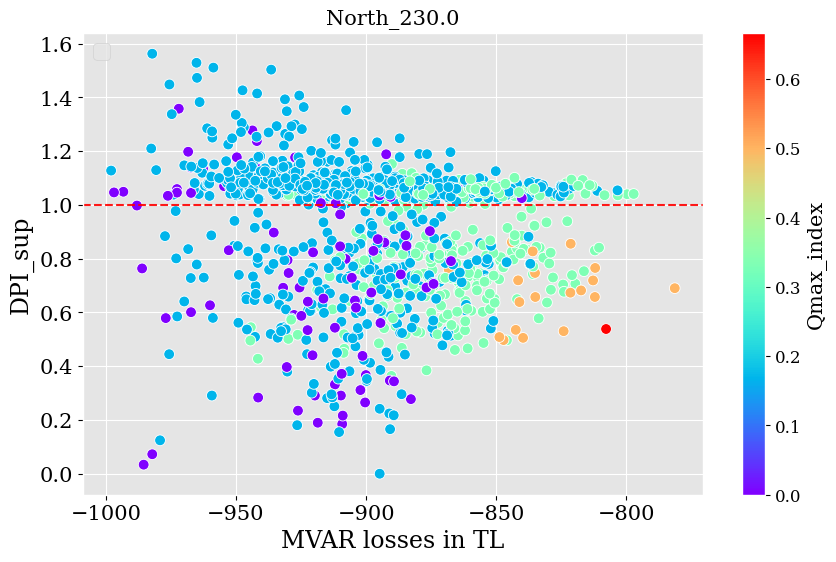

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: -0.1241973351662287


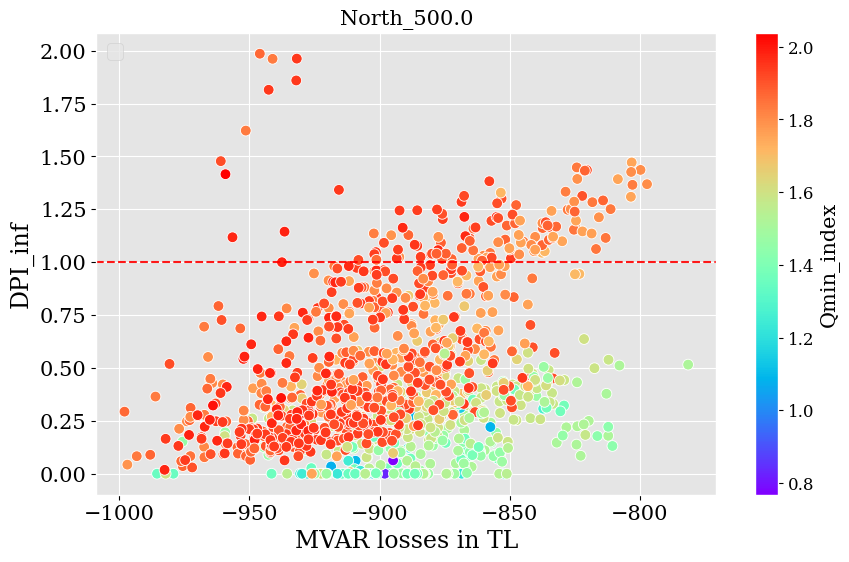

C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: 0.36551436925706393


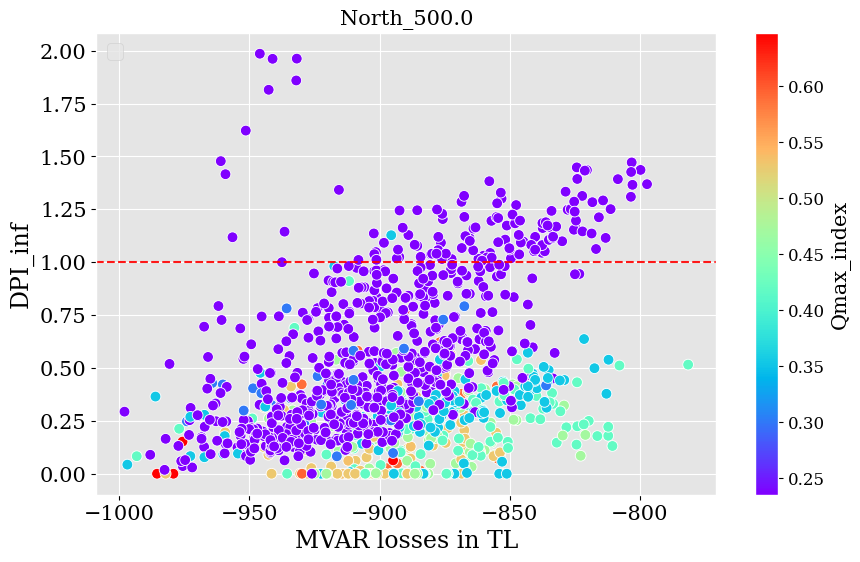

Indice de Correlación: 0.36551436925706393


C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


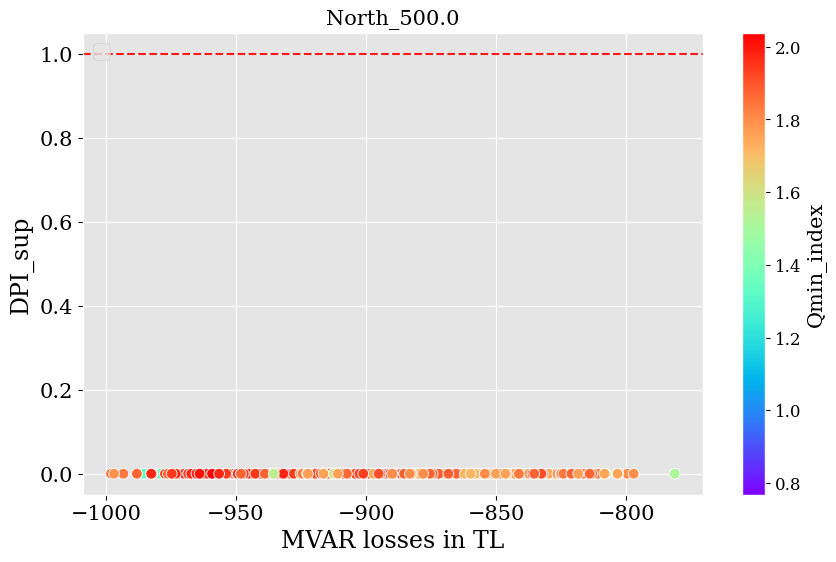

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\david\AppData\Local\Temp\ipykernel_27612\3902054429.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Indice de Correlación: nan


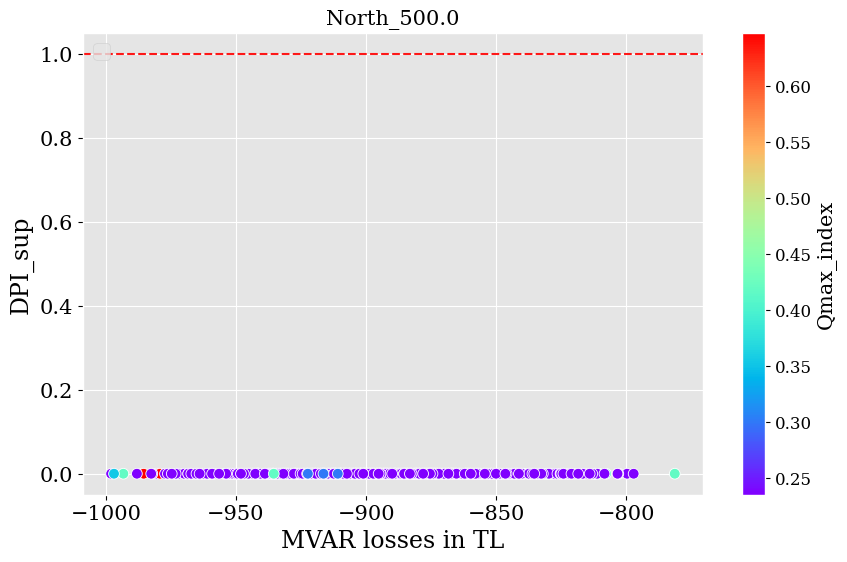

Indice de Correlación: nan


c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [41]:
Region = 'North'
gengroups = ['UHE','230.0','500.0']
grupos = set([word.replace('Qmin_norm_', '').replace('Qmax_norm_', '') for word in DATA['df_Qind'].columns])
for j in gengroups:
    for i in grupos:
        textaux = Region + '_' + j
        if textaux in i:
            scatterplot_1(dfanalise, f'Mvar:Losses_500down_{Region}',f'DPI_inf_{textaux}',xlbl='MVAR losses in TL', ylbl = 'DPI_inf',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', hline=True , title=textaux)
            scatterplot_1(dfanalise, f'Mvar:Losses_500down_{Region}',f'DPI_inf_{textaux}',xlbl='MVAR losses in TL', ylbl = 'DPI_inf',lbl_bar= 'Qmax_index', v3=f'Qmax_norm_{textaux}', hline=True , title=textaux)

            scatterplot_1(dfanalise, f'Mvar:Losses_500down_{Region}',f'DPI_sup_{textaux}',xlbl='MVAR losses in TL', ylbl = 'DPI_sup',lbl_bar= 'Qmin_index', v3=f'Qmin_norm_{textaux}', hline=True , title=textaux)
            scatterplot_1(dfanalise, f'Mvar:Losses_500down_{Region}',f'DPI_sup_{textaux}',xlbl='MVAR losses in TL', ylbl = 'DPI_sup',lbl_bar= 'Qmax_index', v3=f'Qmax_norm_{textaux}', hline=True , title=textaux)

In [42]:
def scatterplot_2(df, v1, v2,v3 = None, xlimites = None, ylimites = None, namedir = None):

    cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
    plt.figure(figsize=(10, 6))
    if v3 == None:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, s=60, legend=None)
    else:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, palette=cmap, hue=v3, s=60, legend=None)
        norm = mcolors.Normalize(vmin=df[v3].min(), vmax=df[v3].max())
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=scatter, orientation='vertical', label='(MW)',)
        # Set color bar tick labels to black
        cbar.ax.yaxis.set_tick_params(color='black',labelsize=12)
        plt.setp(cbar.ax.get_yticklabels(), color='black')
        # Set the color and size of the color bar legend label
        cbar.set_label('(MVAR)', fontsize=15, color='black')

    nometitulo = ''
    plt.title(nometitulo, fontsize = 15)
    plt.xlabel('(MW)', fontsize = 17, color ='black')
    plt.legend(fontsize = 15, loc='upper left')
    plt.ylabel('DPI (pu)', fontsize = 17, color ='black')
    # plt.axhline(1, color='red', linestyle='--', alpha=0.9)
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')
    plt.tick_params(axis='x', colors='black',labelsize=15, rotation = 0)  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks
    if xlimites != None:
        plt.xlim(xlimites)
    if ylimites != None:
        plt.ylim(ylimites)
        
    plt.show()

### Avaliacion mas especifica por barra

In [43]:
# col1 = ['Dia','Hora','REG', 'Cenario','MODV_PU','IndiceInf', 'IndiceSup','Gen_Type','VBASEKV','PL_MW', 'QL_MVAR', 'BUS_ID']
# col2 = ['PL_MW', 'QL_MVAR','ReservaIND','ReservaCAP']
# df1 = df_complete[col1].merge(Df_data_completo_reg[col2], on=['Dia','Hora','REG', 'Cenario'], how='left')
# df11 = df1[(df1['REG']=='SE-CW') & (df1['VBASEKV']==230)]

In [44]:
col1 = ['Dia','Hora','REG', 'Cenario','MODV_PU','IndiceInf', 'IndiceSup','Gen_Type','ReservaIND','ReservaCAP', 'PG_MW', 'QG_MVAR']
col2 = ['PL_MW', 'QL_MVAR']
df2 = df_filt_ger[col1].merge(Df_data_completo_reg[col2], on=['Dia','Hora','REG', 'Cenario'], how='left')
df22= df2[(df2['REG']=='SE-CW') & (df2['Gen_Type']=='UHE')]

In [45]:
col1 = ['Dia','Hora','REG', 'Cenario','MODV_PU','IndiceInf', 'IndiceSup','VBASEKV', 'ReservaINDshunt', 'ReservaCAPshunt']
df3 = df_filt_nt[col1].merge(dfqind2, on=['Dia','Hora','REG', 'Cenario', 'VBASEKV'], how='left')
df33 = df3[(df3['REG']=='SE-CW') & (df3['VBASEKV']==500)]

### Avaliação INDICE e Inestaveis por Tensão

In [46]:
# Vinst = pd.read_csv('C:/Users/david/OneDrive/Documents/FERV_documentos/critical_code4_10.csv').rename(columns={'OP':'key_AC-RO'})
# dpidecompints = dfanalise.loc[:,:,'V2A2F2 2026'].merge(Vinst, on='key_AC-RO', how='inner').sort_values('count', ascending = False).iloc[:,5:-2]
# max_columns = dpidecompints.iloc[:, :].idxmax(axis=1)
# # Getting the maximum values themselves
# max_values = dpidecompints.iloc[:, :].max(axis=1)
# print("Columns with maximum values:")
# print(max_columns)
# print("Maximum values:")
# print(max_values)

# # Getting the column names with the maximum values
# max_columns = dfinstensao.iloc[:, 1:-1].idxmax(axis=1)
# # Getting the maximum values themselves
# max_values = dfinstensao.iloc[:, 1:-1].max(axis=1)
# print("Columns with maximum values:")
# print(max_columns)
# print("Maximum values:")
# print(max_values)

### Otros PLOTS

In [47]:
# plot_potencia_perfil_2(df_mask, dfanalise.reset_index()[dfanalise.reset_index()['Cenario']=='V2A2F2 2026'], ['Fluxo_N-S'], ['PG_MW_North'],'(MW)', ylabelrigth='(MW)', markers=False)
# # plot_potencia_perfil_2(df_mask, dfanalise.reset_index()[dfanalise.reset_index()['Cenario']=='V2A2F2 2026'], ['Fluxo_N-S'], ['Fluxo_NE-SE'],'(MW)', ylabelrigth='(MW)', markers=False)
# plot_potencia_perfil_2(df_mask, dfanalise.reset_index()[dfanalise.reset_index()['Cenario']=='V2A2F2 2026'], ['Fluxo_N-S'], ['% L1_500down_SE-CW'],'(MW)', ylabelrigth='(MW)', markers=False)

In [48]:
# plot_potencia_perfil_2(df_mask, dfanalise, ['OV DPI_PV_AC-RO'], ['QG_MVAR_AC-RO'], markers=False, ylim=[0,2])
# plot_potencia_perfil_2(df_mask, dfanalise, ['OV DPI_PV_AC-RO'], ['JARAR-PCH138'], markers=False, ylim=[0,2])
# plot_potencia_perfil_2(df_mask, dfanalise, ['OV DPI_PV_North'], ['% L1 | SLUIS2-MA230 | SLUIS4-MA230'], markers=False, ylim=[0,2])

In [49]:
# DFF6 = DF_complete_PO.merge(DATA['df_indice_grop'], on=['Dia', 'Hora', 'Cenario'], how='left').reset_index()
# plot_potencia_perfil_2(df_mask, DFF6[DFF6['Cenario']==target_scenario], ['S_Antonio_MW'],'DPI_PO_final', markers=False)
# plot_potencia_perfil_2(df_mask, DFF6[DFF6['Cenario']==target_scenario], ['Tucurui_MW'],'DPI_PO_final', markers=False)
# plot_potencia_perfil_2(df_mask, DFF6[DFF6['Cenario']==target_scenario], ['B_Monte_MW'],'DPI_PO_final', markers=False)
# plot_potencia_perfil_2(df_mask, DFF6[DFF6['Cenario']==target_scenario], ['I_Solt_MW'],'DPI_PO_final', markers=False)
# plot_potencia_perfil_2(df_mask, DFF6[DFF6['Cenario']==target_scenario], ['Jirau_MW'],'DPI_PO_final', markers=False)

# plot_potencia_perfil(df_mask, DFF6, 'Jirau_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'S_Antonio_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'B_Monte_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'Tucurui_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'I_Solt_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'Itaipu_50_MW', markers=False)
# plot_potencia_perfil(df_mask, DFF6, 'Itaipu_60_MW', markers=False)

In [50]:
# df_aux_sup = DATA['features_sup_pv_df'].merge(DATA['features_sup_pq_df'], on = ['Dia', 'Hora', 'Cenario'], how='left').set_index(['Dia', 'Hora', 'Cenario'])
# datapd_ov = DFF6.merge(df_aux_sup, on=['Dia','Hora','Cenario'], how='left').reset_index()
# df_aux_inf = DATA['features_inf_pv_df'].merge(DATA['features_inf_pq_df'], on = ['Dia', 'Hora', 'Cenario'], how='left').set_index(['Dia', 'Hora', 'Cenario'])
# datapd_uv = DFF6.merge(df_aux_inf, on=['Dia','Hora','Cenario'], how='left').reset_index()

# plot_potencia_perfil_2(df_mask, datapd_uv[datapd_uv['Cenario']==target_scenario], ['DPI_PO_final'], ['BUGRESPCH006'], markers=False)
# plot_potencia_perfil_2(df_mask, datapd_uv[datapd_uv['Cenario']==target_scenario], ['DPI_PO_final'], ['LECHUG-AM500'], markers=False)

## Analise Correlação e Distribução Intercambios e Linhas

In [51]:
# def scatterplot(df, v1, v2,v3 = None, xlimites = None, ylimites = None, namedir = None):

#     cmap = plt.cm.get_cmap("rainbow")  # '_r' suffix to reverse the colormap
#     plt.figure(figsize=(10, 6))
#     if v3 == None:
#         scatter = sns.scatterplot(data=df, x=v1, y=v2, s=60, legend=None)
#     else:
#         scatter = sns.scatterplot(data=df, x=v1, y=v2, palette=cmap, hue=v3, s=60, legend=None)
#         norm = mcolors.Normalize(vmin=df[v3].min(), vmax=df[v3].max())
#         sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#         sm.set_array([])
#         cbar = plt.colorbar(sm, ax=scatter, orientation='vertical', label=v3)

#     # plt.grid(True, which="both", linestyle='--', linewidth=0.5)
#     # nometitulo = f'{namedir} Scatter plot of {v2} vs {v1}'.replace(':',' ')
#     # nometitulo = f'Scatter plot of {v2} vs {v1}'.replace(':',' ')
#     nometitulo = ''
#     plt.title(nometitulo, fontsize = 15)
#     plt.xlabel(v1, fontsize = 17)
#     plt.ylabel(v2, fontsize = 17)
#     plt.tick_params(axis='both', labelsize=15)
#     # plt.axhline(0, color='red', linestyle='--', alpha=0.9)
#     if xlimites != None:
#         plt.xlim(xlimites)
#     if ylimites != None:
#         plt.ylim(ylimites)
        
#     # if namedir != None:
#         # nome = folderimg+'Correlações/' + namedir + nometitulo + '.svg'
#         # # plt.savefig(nome)
#         # nome = folderimg+'Correlações/' + namedir + nometitulo + '.png'
#         # # plt.savefig(nome)
#     plt.show()

#     correlation = df[v1].corr(df[v2])
#     print(f"Indice de Correlación: {correlation}")


In [52]:
# scatterplot(Df_data_completo_reg.loc[:,:,'South',:], 'PL_MW', '% L1_500down', 'PG_MW')
# scatterplot(Df_data_completo_reg.loc[:,:,'South',:], 'PL_MW', '% L1_500down', 'Mvar:Losses_500down')

# scatterplot(Df_data_completo_reg.loc[:,:,'AC-RO',:], 'PL_MW', '% L1_500down', 'PG_MW', ylimites=[-10,200])
# scatterplot(Df_data_completo_reg.loc[:,:,'AC-RO',:], 'PL_MW', '% L1_500down', 'Mvar:Losses_500down', ylimites=[-10,200])

In [53]:
# scatterplot(dfanalise, 'B_Monte_MW' , 'Fluxo_N-S', 'Mvar:Losses_500up_SE-CW')
# scatterplot(Df_data_completo_reg.loc[:,:,'AC-RO',:], 'PL_MW', 'Mvar:Losses_500down', 'PG_MW')
# scatterplot(Df_data_completo_reg.loc[:,:,'South',:], 'PL_MW', '% L1_500down', 'Mvar:Losses_500down')

In [54]:
# df_linhas_500up = DATA['df_linhas'][DATA['df_linhas']['VBASEKV'].isin([500, 525, 765])]
# df_linhas_500down = DATA['df_linhas'][DATA['df_linhas']['VBASEKV'].isin([230, 345, 440])]
# df_linhas_500up_grouped = df_linhas_500up.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500up', 'Mvar:Losses': 'Mvar:Losses_500up'})
# df_linhas_500down_grouped = df_linhas_500down.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500down', 'Mvar:Losses': 'Mvar:Losses_500down'})
# df_linhas_grouped_REG = pd.concat([df_linhas_500up_grouped, df_linhas_500down_grouped], axis=1)
# dfff_lines = DATA['df_linhas'].drop_duplicates(subset=['From#', 'To#']).groupby(by=['Dia', 'Hora', 'Cenario','REG','VBASEKV']).count()
# dfff_lines.loc[1,'00-00','V2A2F2 2026',dfff_lines.index.get_level_values('VBASEKV').isin([230,345,440,500,525])]

# Analise Intercambios e Linhas

In [55]:
DATA['df_linhas'].columns

Index(['key', 'From#', 'To#', 'From Name', 'To Name', '% L1', 'L1(MVA)',
       'Mvar:Losses', 'MW:Losses', 'Dia', 'Hora', 'REG', 'VBASEKV', 'MVA',
       'MW:From-To', 'MW:To-From', 'Power Factor:From-To',
       'Power Factor:To-From', 'Cenario', 'MW_Flow', 'PI_mva'],
      dtype='object')

In [56]:
df_linhas_500up = DATA['df_linhas'][DATA['df_linhas']['VBASEKV'].isin([500, 525, 765])]
df_linhas_500down = DATA['df_linhas'][DATA['df_linhas']['VBASEKV'].isin([230, 345, 440])]
df_linhas_500up_grouped = df_linhas_500up.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'MW_Flow': 'sum','% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'MW_Flow': 'MW_Flow_over500','% L1': '% L1_over500', 'Mvar:Losses': 'Mvar:Losses_over500'})
df_linhas_500down_grouped = df_linhas_500down.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'MW_Flow': 'sum','% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'MW_Flow': 'MW_Flow_under500','% L1': '% L1_under500', 'Mvar:Losses': 'Mvar:Losses_under500'})
df_linhas_grouped_REG = pd.concat([df_linhas_500up_grouped, df_linhas_500down_grouped], axis=1)
df_linhas_grouped_REG = df_linhas_grouped_REG.rename(index=regionmap, level='REG')

In [57]:
def boxplot_linhas(df, clase, yvalue, titulo, xlbl, ylbl, ylim = None):
    df = df.reset_index()
    plt.figure(figsize=(12, 6))

    # ax = sns.boxplot(data=df, x=clase, y=yvalue, hue="Cenario", width=0.8, linewidth=1.5, palette="mako",flierprops={'markerfacecolor': 'gray', 'marker': 'o'})
    ax = sns.boxplot(data=df, x=clase, y=yvalue, hue=clase, width=0.8, linewidth=1.5, palette="mako",flierprops={'markerfacecolor': 'gray', 'marker': 'o'})
    # Customize axes spines
    border_color = 'black'
    linewidth = 1.2
    ax.spines['top'].set_color(border_color)
    ax.spines['bottom'].set_color(border_color)
    ax.spines['left'].set_color(border_color)
    ax.spines['right'].set_color(border_color)
    ax.spines['top'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['right'].set_linewidth(linewidth)

    # Customize the boxplot elements
    for cap in ax.artists:
        cap.set_edgecolor(border_color)
        cap.set_facecolor('white')

    for median in ax.lines:
        median.set_color('darkblue')
        median.set_linewidth(1.5)

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=16, color='black')
    plt.ylabel(ylbl, fontsize=16, color='black')
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')
    # plt.legend(title='Scenarios', loc='best', fontsize=13)
    #labels
    plt.tick_params(axis='x', colors='black')  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks
    if ylim !=  None:
        plt.ylim(ylim)
    plt.show()
    
if Analise_Linhas:
    filtrolinh = set(df_linhas_500down[(df_linhas_500down['REG']=='AC-RO') & (df_linhas_500down['% L1']>50)][['Dia','Hora']].apply(tuple, axis=1).values)
    filter_outliers = Df_data_completo_reg.index.to_frame()[['Dia', 'Hora']].apply(tuple, axis=1).isin(filtrolinh)
    # Df_data_completo_reg_ = Df_data_completo_reg[~filter_outliers].loc[:,:,:,['V1A1F2 2026','V1A1F2 2026']]
    Df_data_completo_reg_ = Df_data_completo_reg[~filter_outliers]

    boxplot_linhas(Df_data_completo_reg_, 'REG', '% L1_500up' , 'Carregamento Médio das linhas com nivel de tensão >= 500kV', 'Region', 'Line Loading (%)', ylim = None)
    boxplot_linhas(Df_data_completo_reg_, 'REG', 'Mvar:Losses_500up' , 'Soma Perdas Reativas das linhas com nivel de tensão >= 500kV', 'Region', 'Losses (MVAR)', ylim = None)
    boxplot_linhas(Df_data_completo_reg_, 'REG', '% L1_500down' , 'Carregamento Médio das linhas com nivel de tensão < 500kV', 'Region', 'Line Loading (%)', ylim = None)
    boxplot_linhas(Df_data_completo_reg_, 'REG', 'Mvar:Losses_500down' , 'Soma Perdas Reativas das linhas com nivel de tensão < 500kV', 'Region', 'Losses (MVAR)', ylim = None)

NameError: name 'Analise_Linhas' is not defined

In [ ]:
def scatterplot(df, v1, v2, v3=None, xlimites=None, ylimites=None, namedir=None):
    cmap = plt.cm.get_cmap("rainbow_r")  # '_r' suffix to reverse the colormap
    plt.figure(figsize=(10, 6))
    
    if v3 is None:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, s=60, legend=None)
    else:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, palette=cmap, hue=v3, s=60, legend=None)
        norm = mcolors.Normalize(vmin=df[v3].min(), vmax=df[v3].max())
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=scatter, orientation='vertical', label='% FERV',)
        # Set color bar tick labels to black
        cbar.ax.yaxis.set_tick_params(color='black',labelsize=12)
        plt.setp(cbar.ax.get_yticklabels(), color='black')
        # Set the color and size of the color bar legend label
        cbar.set_label('% FERV', fontsize=15, color='black')

    nometitulo = ''
    plt.title(nometitulo, fontsize=15)
    plt.xlabel('Loading %', fontsize=16, color='black')
    plt.ylabel('(MVAR)', fontsize=16, color='black')
    plt.tick_params(axis='both', labelsize=15, labelcolor='black')  # Set the color for the tick labels
    plt.tick_params(axis='x', colors='black')  # Set the color for the x-axis ticks
    plt.tick_params(axis='y', colors='black')  # Set the color for the y-axis ticks

    if xlimites is not None:
        plt.xlim(xlimites)
    if ylimites is not None:
        plt.ylim(ylimites)

    plt.show()

    correlation = df[v1].corr(df[v2])
    print(f"Indice de Correlación: {correlation}")

In [ ]:
df_linhas_grouped_REG_ = df_linhas_grouped_REG.reset_index().merge(DF_complete_PO, on=['Dia','Hora', 'Cenario']).reset_index().set_index(['Dia', 'Hora', 'REG', 'Cenario'])

C:\Users\david\AppData\Local\Temp\ipykernel_26224\3290495462.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow_r")  # '_r' suffix to reverse the colormap


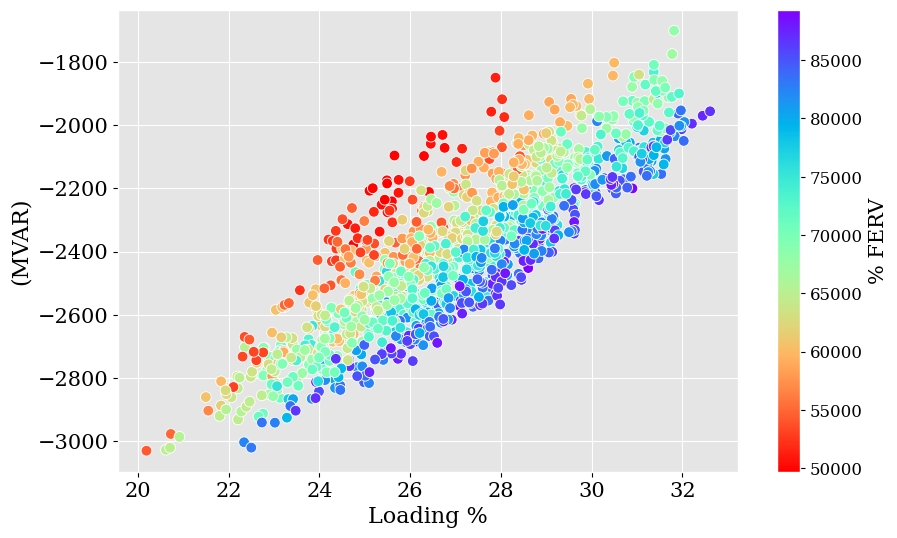

C:\Users\david\AppData\Local\Temp\ipykernel_26224\3290495462.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow_r")  # '_r' suffix to reverse the colormap


Indice de Correlación: 0.8626103209994064


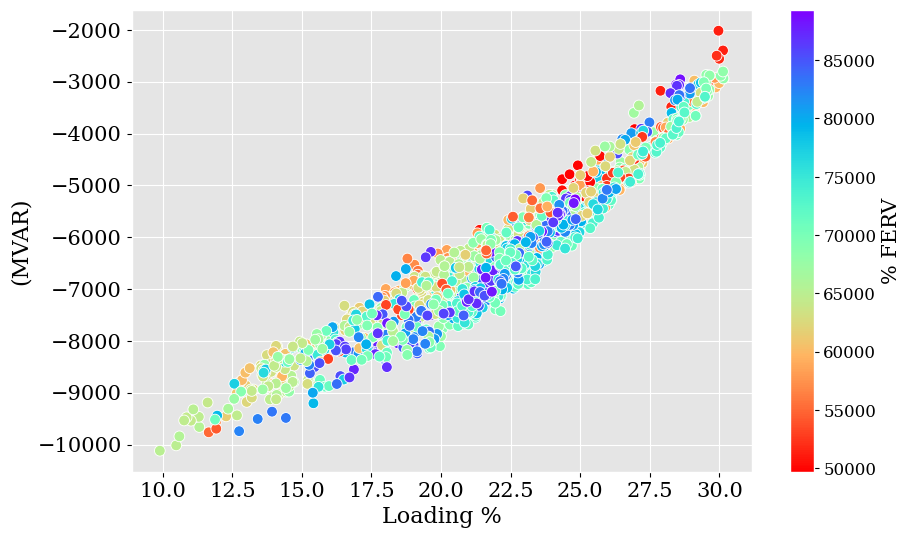

Indice de Correlación: 0.955031497417992


In [ ]:
reg = 'Northeast'
# scatterplot(Df_data_completo_reg.loc[:,:,'SE-CW',:], 'PL_MW', '% L1_500down', 'PG_MW', ylimites=[-10,200])
# scatterplot(df_linhas_grouped_REG.loc[:,:,reg,:],'MW_Flow_under500', '% L1_under500', 'Mvar:Losses_under500')
# scatterplot(df_linhas_grouped_REG.loc[:,:,reg,:],'MW_Flow_over500', '% L1_over500', 'Mvar:Losses_over500')

# scatterplot(df_linhas_grouped_REG_.loc[:,:,reg,:],'% L1_over500', 'Mvar:Losses_over500', 'PG_FERV')
# scatterplot(df_linhas_grouped_REG_.loc[:,:,reg,:],'% L1_under500', 'Mvar:Losses_under500','PG_FERV')

scatterplot(df_linhas_grouped_REG_.loc[:,:,reg,:],'% L1_under500', 'Mvar:Losses_under500','PG_MW')
scatterplot(df_linhas_grouped_REG_.loc[:,:,reg,:],'% L1_over500', 'Mvar:Losses_over500', 'PG_MW')

In [ ]:
# boxplot_linhas(df_linhas_grouped_REG.loc[:,:,:,['V2A2F2 2026','V2A2F5 2026']], 'REG', 'MW_Flow_under500' , 'Soma do Fluxo das linhas com nivel de tensão < 500kV', 'Region', '(MW)', ylim = None)

In [ ]:
df_1 = DATA['df_Inter_AC_DC'].reset_index().melt(id_vars=['key','Dia', 'Hora', 'Cenario'], var_name='Intercambio', value_name='Value')
df_fluxos_AC = df_1[df_1['Intercambio'].isin(['Fluxo_N-S', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_SUL-SECO'])]
df_fluxos_DC = df_1[df_1['Intercambio'].isin(['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE'])]
# Paso 1: Filtrar los valores negativos
negativos = df_1[df_1['Value'] < 0]
# Paso 2: Contar cuántos valores negativos hay para cada 'Intercambio'
conteo_negativos = negativos.groupby('Intercambio').size()
# Paso 3: Contar el número total de entradas para cada 'Intercambio'
conteo_total = df_1.groupby('Intercambio').size()
# Paso 4: Calcular el porcentaje
porcentaje_negativos = (conteo_negativos / conteo_total) * 100
# Mostrar el resultado
print(porcentaje_negativos)

Intercambio
EXP_NE                  NaN
Elo_FOZ-IBIUNA          NaN
Elo_PVEL-ARARQ          NaN
Elo_XINGU-SE            NaN
Fluxo_N-S          1.116071
Fluxo_NE-N              NaN
Fluxo_NE-SE             NaN
Fluxo_SUL-SECO    30.654762
dtype: float64


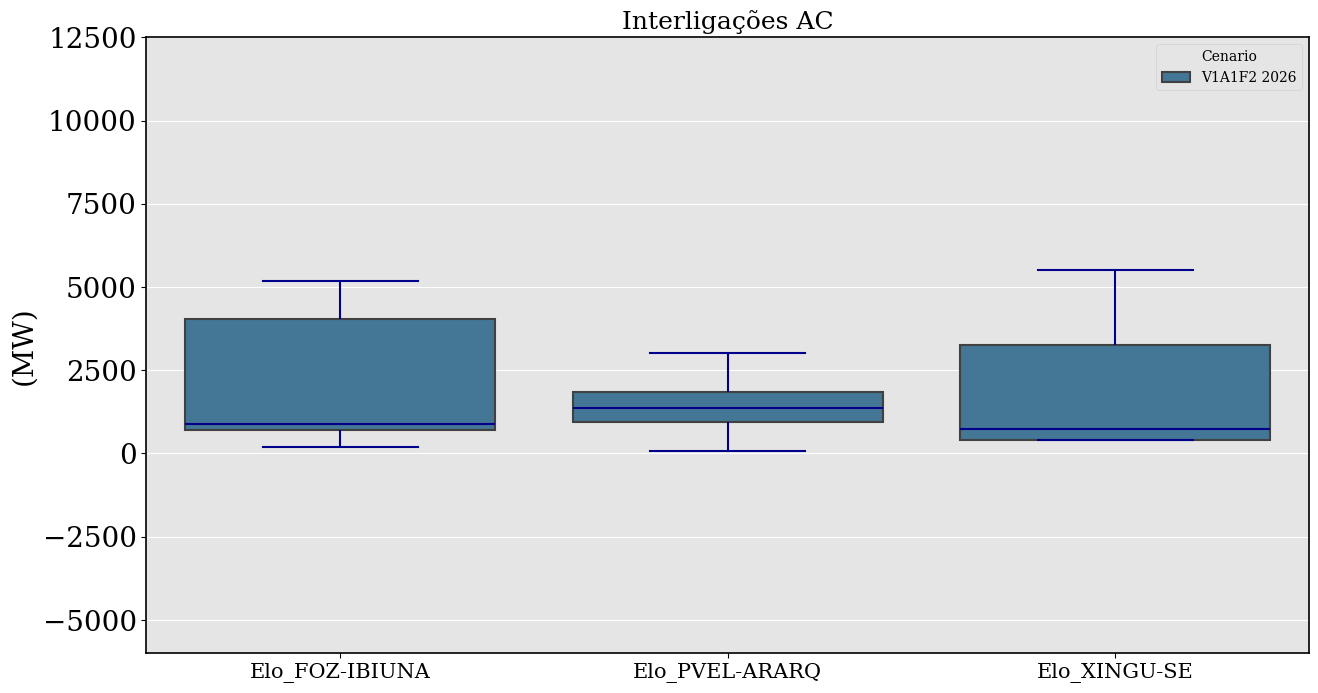

In [ ]:
# boxplot_(df_1[df_1['Cenario'].isin(['V2A2F2 2026','V2A2F5 2026'])],'Value', clase = "Intercambio", hue='Cenario', titulo = 'Interligações AC/HVDC', xlbl = '',ylbl ='(MW)')
boxplot_(df_fluxos_DC,'Value', clase = "Intercambio", hue='Cenario', titulo = 'Interligações AC', xlbl = '',ylbl ='(MW)', ylim=[-6000,12500])

In [ ]:
# def plot_potencia_perfil(df_resultado, df_data, column, ylim = None, markers=True,):

#     df = df_resultado.merge(df_data,on=['Dia','Hora', 'Cenario'], how='left')
#     plt.figure(figsize=(20, 7))
#     sns.lineplot(data=df, x='Dia_Hora', y=column, hue='Cenario', markers=markers, lw = 2)
#     plt.xlabel('(Dia, Hora)', fontsize = 15)
#     plt.ylabel('(MW)', fontsize = 15)
#     if column == 'DemandaLiquida':
#         plt.title(f'Demanda Liquida Total do Sistema', fontsize = 15)
#     else:
#         plt.title(f'Perfil de Potencia de {column}', fontsize = 15)

#     value = int(df['Dia_Hora'].unique().shape[0] / 28)
#     selected_ticks = df[df['Cenario'] == df['Cenario'].unique()[0]].iloc[::value]['Dia_Hora']
#     plt.xticks(selected_ticks, rotation=45, fontsize=12)
#     plt.tick_params(axis='y', labelsize=12)
#     plt.legend(title='Cenarios', fontsize = 12)
#     if ylim != None:
#         plt.ylim(ylim)
#     plt.tight_layout()
#     plt.grid()
#     plt.show()

# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Elo_FOZ-IBIUNA', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Elo_PVEL-ARARQ', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Elo_XINGU-SE', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Elo_CPVBTB-PVEL', markers=False)

In [ ]:
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Fluxo_N-S', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Fluxo_NE-N', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Fluxo_NE-SE', markers=False)
# plot_potencia_perfil(df_mask, DATA['df_Inter_AC_DC'], 'Fluxo_SUL-SECO', markers=False)

In [ ]:
# # fluxoONS = pd.read_csv("C:/Users/David/OneDrive/Documents/FERV_documentos/DATA NORUS/fluxo_intercambio_NORUS_2022/fluxo_intercambio/fluxo_intercambio_FNS.csv", sep=';')
# fluxoONS = pd.read_csv("C:/Users/David/OneDrive/Documents/FERV_documentos/DATA NORUS/fluxo_intercambio_NORUS_2026_V1A1F2_FNS_lim/fluxo_intercambio_FNS.csv", sep=';')
# # fluxoONS = pd.read_csv('C:/Users/David/OneDrive/Documents/FERV_documentos/DATA NORUS/fluxo_intercambio_NORUS_2026_V1A1F2_FNS_lim_REV2/fluxo_intercambio_FNS.csv', sep=';')


# cenario = 'V2A2F2 Scenario 2026'

# fluxoONS = fluxoONS.drop(fluxoONS.columns[0], axis=1)
# fluxoONS = fluxoONS.drop(fluxoONS.columns[0], axis=1)
# fluxoONS = fluxoONS.rename(columns={'periodo': 'Dia', 'hora': 'Hora', 'MW':'Fluxo_N-S_DESSEM'})
# fluxoONS['Hora'] = fluxoONS['Hora'].str.replace(':','-')
# fluxoONS['Dia'] = fluxoONS['Dia'].str.slice(0, 2)
# fluxoONS = fluxoONS.melt(id_vars=['Dia','Hora'], value_vars='Fluxo_N-S_DESSEM', var_name='Intercambio', value_name='Value').set_index(['Dia','Hora','Intercambio'])

# df_2 = df_1[df_1['Cenario']==cenario].copy()
# df_2['Dia'] = df_2['Dia'].astype(str)
# df_2['Dia'] = df_2['Dia'].str.zfill(2)
# intercambio_previsto = df_2.set_index(['Dia', 'Hora','Intercambio']).drop(columns='Cenario')
# # intercambio_previsto = df_1.set_index(['Dia', 'Hora','Intercambio', 'Cenario'])
# # intercambio_previsto = intercambio_previsto.loc[:,:,:,'V1A1F2 Scenario 2022']

# df_compare_fluxs = pd.concat([fluxoONS,intercambio_previsto],axis = 0).reset_index()
# df_compare_fluxs['Dia'] = df_compare_fluxs['Dia'].astype(str)
# df_compare_fluxs['Dia_Hora'] = '(' + df_compare_fluxs['Dia'] + ', ' + df_compare_fluxs['Hora'] + ')'

In [ ]:
# # Assuming df_compare_fluxs is already defined
# df = df_compare_fluxs
# condition = df['Intercambio'].isin(['Fluxo_N-S','Fluxo_N-S_DESSEM'])

# # Plotting
# plt.figure(figsize=(20, 7))
# plot = sns.lineplot(data=df[condition], x='Dia_Hora', y='Value', hue='Intercambio', style=None, markers=False)
# plt.xlabel('(Dia, Hora)', fontsize=15)
# plt.ylabel('(MW)', fontsize=15)
# plt.title(f'Power Flow Profile of {cenario}', fontsize=15)
# value = int(df['Dia_Hora'].unique().shape[0] / 28)
# selected_ticks = df[df['Intercambio'] == df['Intercambio'].unique()[0]].iloc[::value]['Dia_Hora']
# plt.xticks(selected_ticks, rotation=45, fontsize=12)
# plt.tick_params(axis='y', labelsize=12)

# # Get the current handles and labels
# handles, labels = plot.get_legend_handles_labels()
# new_labels = ['Fluxo_N-S_DESSEM', 'Fluxo_N-S_HPPA']  # Update these with your desired legend names

# # Set the legend with the new labels
# plt.legend(handles, new_labels, title='Fluxos', fontsize=12)
# # Add horizontal lines
# plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
# plt.axhline(-1000, color='red', linestyle='--', alpha=0.9)

# plt.tight_layout()
# plt.grid()
# plt.show()